# Data Science for Marketing | Practical Exam
## Introduction

In the practical exam, you will have ~7 days to work on a set of questions related to the analysis of different datasets. <br>
This activity does not intend to test your ability as a programmer.<br>
Instead, it aims to test your ability to study different problems using data-driven approaches using Statistical, Unsupervised, and Supervised Learning methods to support your decisions/conclusions.

**Notes** <br>
* All data your reported analysis needs to be reproducible in this notebook; <br>
* The task is individual but students are invited to discuss and brainstorm in group, which is a very effective learning strategy; <br>
* You should document all steps and code, failing to do so can lead to a penalty; <br>
* If you sourced code from third-party sources you should cite them; <br>
* This is an individual activity and weights 50% (10 points) of your final mark;<br>
* Feel free to answer questions in Portuguese; <br>
* Consider taking the most of the available Python libraries that you were introduced to during the semester, and feel free to explore aditional ones.

**Submission Details** <br>
The deadline for the submission is December 15th at 23:59. Submission through the corresponding activity in the Curricular Unit Moodle page. Your submission should consist of an archive __(zip file only)__ containing the following documents: <br>
1) A copy of this notebook with your answers in .ipynb format; <br>
2) A HTML version of the notebook with your answers (File -> Download As -> HTML); <br>
3) The Authorship Statement signed; <br> 

Documents 1) and 2) should be named with your student number, _e.g. M2020123.ipynb and M2020123.html_ <br>
__Submissions in .rar archives will not be graded.__ <br>
Submissions missing the original jupyter notebook format will not be graded.<br>
You do not need to include the datasets with the notebook <br>
Failing to comply with these guidelines will incur in a penalty. <br>
Late Submissions will incur a penalty of 1 point per day late.

### Good Luck, and enjoy!

## Details

Fill this cell with your following details:

Name: Diogo de Bernardes Henriques e Almeida Diogo <br>
StudentID: m20201131 <br>
E-Mail: m20201131@novaims.unl.pt <br>

## Boilerplate

Before we start, let us make sure that we have all the necessary packages installed in our working environment. We will also organize our file structure by creating a DATA folder to store all datasets. <br>
To that end, run the following cells to install and load all the necessary libraries. <br>
You can check in the third cell the output with  the versions of the main libraries that have been used in the preparation of this exam.

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn

In [2]:
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile

In [3]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('Scikit-Learn version ',sc.__version__)

Pandas version  1.0.1
Numpy version  1.18.1
Scipy version  1.4.1
Seaborn version  0.11.0
Scikit-Learn version  0.22.1


In [4]:
!pip install seaborn --upgrade

## Part I - Exploratory Data Analysis (25% | 5 points)

In the first part of the practical exam, we will explore a dataset on a Marketing Campaign for Banking.
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

_Source - [Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

The aim of Part I is to apply statistical methods in order to develop a deeper understanding of the dataset and problem. A good first step to have a more educated guess on what steps should follow.

In order to download the data to your computer, start by running the cell below. <br>
The data is in a .csv file with the name "bank_dataset", there is also an auxiliary .txt file with the name "bank_dataset_description" that provides a short description of all features in the dataset.<br>

Notes: <br>
- Consider also the method .pivot_table() as an alternative to .grouby() or .agg(). You can find more details at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html.
- Consider using data visualization (using pandas plot or Seaborn) to report your results.

Answer each question in Markup Cell and use visualizations whenever you can to support your findings.

In [5]:
r = requests.get('https://www.dropbox.com/s/sifhl86lalrxs2v/partiv2.zip?dl=1', allow_redirects=True)
open('partiv2.zip', 'wb').write(r.content);
with ZipFile('partiv2.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

## Introduction

The main objective of this part of the project is to get a clearer understanding of the next steps that a portuguese banking institution should take in order to optimize their telemarketing campaigns based on historical data from May 2008 to November 2010. 

Through an analysis of demographic attributes and past campaign performance, one is able to understand how to increase the conversion rate of the acceptance of the bank term deposit.

## Understanding and Cleaning the Data

By performing statistical analysis, it will be possible to understand with which variables we are dealing with and if it is necessary to perform any modification to the dataset.

**[Q1]** Describe the variables present in the dataset. Are there missing values? Should you process or clean any of the variables, how and why? Perform the necessary steps.

Load the dataset to a Pandas Dataframe. 

In [6]:
path = r"C:\Users\Diogo\Documents\NOVA IMS\DS4M\Exame\partiv2\parti\bank_dataset.csv"
Bank_Data = pd.read_csv(path, sep = ';')

The dataset is divided by semi-colons so we need instruct the function to read the .CSV file correctly.

In [7]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Here we can see the following:

'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' are numeric;

'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' and 'y' are categorical.

In the following part we will understand what each variable refers to:

## Variable Definition and Types

There are some **demographics** variables present like 'age', 'job', 'marital' and 'education', which are all object types, but age which is an integer.

We also have object variables related to the **bank's products** and ammount stored like:
- 'default' which is variable that allows to understand if there's credit in default;
- 'housing' and 'loans' that represent if there's housing loans or personal loans, respectively.
- 'balance' which is an integer that captures the amount of money that a user has in the bank;

In this dataset we can also see **marketing campaign** variables like:
- 'contact' which is an object that captures the medium used to establish a contact;
- 'day_of_the_week' and 'month' which are object variables that capture when has the contact been done;
- 'duration' that's an integer that says how many seconds has the contact lasted;
- 'campaign' which is an integer that says how many contacts were made for that user for that campaign;
- 'pdays' also an integer which registers the number of days that have passed since the last contact;
- 'previous' an integer that represents how many contacts were made to that user before this campaign;
- 'poutcome' that is an object that captures the success of the previous campaign;
- 'y' that captures if the current campaign has been successful;

Finally, there's variables regarding **rates** such as:
- 'emp.var.rate' which is a float that represents employment variation rate;
- 'cons.price.idx' and 'cons.conf.idx' which are also floats and indexes that represent respectively the consumer price and confidence;
- 'euribor3m' that is the 3 month rate indicator for euribor;
- 'nr.employed' that's also a float that gives the number of employees.

## Describing the Numeric Variables

In [8]:
Bank_Data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Demographic

The youngest client is 17 and the oldest is 98. The average client's age is approximately 40 years;

### Past Campaign

The average duration of a contact is approximately 258 seconds (4 minutes and 18 seconds), but the longest contact has lasted almost 82 minutes (1 hour and 22 minutes);

The maximum frequency of contact was 56 interactions, while the least has been 1. On average, a user receives approximately 3 contacts regarding the campaign;

In this dataset, there are clients which haven't been contacted with previous campaigns (pdays = 999) and those that have been contacted more than once in the same day to receive a call regarding a previous and a current campaign (pdays = 0). In this analysis, one shouldn't look into the standard deviation as the default value for no contact is '999', it leads to biased results;

Even though there are clients that haven't been contacted regarding a previous campaign, there was at least one user that been contacted 7 times. On average, a user was contacted 0.17 times with a prior campaign.

### Indexes

Throughout the period of analysis, the employment variation rate has gravitated between -3,4% to 1,4% and assumed a mean value of 0,08%;

The consumer price index hasn't changed much ranging only between 92.2 to 94.8 and on average it was at 93.6;

However, the consumer confidence index assumed a minimum value of -50.8 and maximum value of -26.9 which displays a wide variance in the time period being considered. On average, it assumed a value of -40.5;

Euribor3m has had a lowest point on 0.63% and a peak at 5.05%, but on average it stayed at 3.62;

Finally, the nr.employed changed between a minimum of 4.963 and a maximum of 5.228 employees. The mean is 5.167.

This data isn't relevant as we can't associate the indexes to a period in time.

## Describe categorical variables:

In [9]:
Bank_Data.describe(include = 'O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Demographic

The most common job category is 'admin.', just like 'married' is the most frequent marital status. The education of the clients is predominantly of 'university.degree';

### Bank Related

The majority of the clients don't have a credit in default nor do they have a personal loan, but they do have a housing loan;

### Campaign Related

The contact is usually done through a 'cellular', and the month of highest contact frequency was 'may', being thursday the day in which most contacts were done;

The outcome of previous campaigns is 'nonexistent' which means that the majority hasn't been contacted with a previous campaign and most people has said 'no' to the current campaign.

## Missing Values

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

### Verifying if there's any missing value other than 'Unknown'

In [10]:
Bank_Data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There's no traditional missing value, so let's move on to understand the relevance of 'unknown' in the dataset:

### Impact of 'Unknown' in the dataset

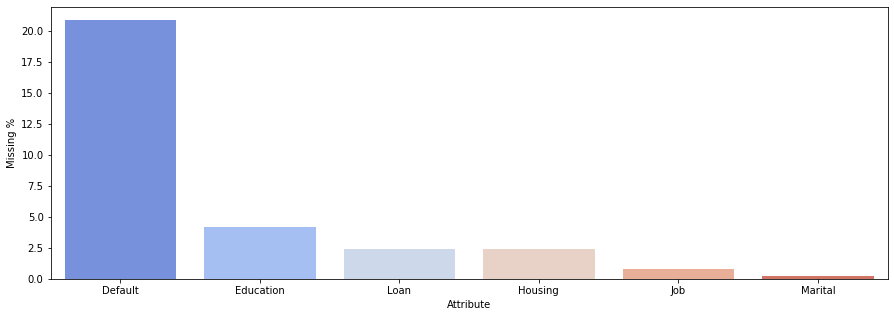

In [11]:
missingjob = round(Bank_Data[Bank_Data['job'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)
missingmarital = round(Bank_Data[Bank_Data['marital'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)
missingeducation = round(Bank_Data[Bank_Data['education'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)
missingdefault = round(Bank_Data[Bank_Data['default'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)
missinghousing = round(Bank_Data[Bank_Data['housing'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)
missingloan = round(Bank_Data[Bank_Data['loan'] == 'unknown'].shape[0]/Bank_Data.shape[0]*100,2)

missings_Bank_Data =pd.DataFrame({'Attribute':['Job','Marital','Education','Default','Loan','Housing'],'Missing %':[missingjob,missingmarital,missingeducation,missingdefault,missingloan,missinghousing]}).sort_values(by = 'Missing %', ascending = False)
plt.figure(figsize = (15,5))
ax = sns.barplot(x="Attribute", y="Missing %", data=missings_Bank_Data, palette = 'coolwarm')

Default is a variable that has over 20% of it's content filled with 'unknown' so it must be droped:

In [12]:
cols_to_drop_Bank_Data_1 = ['default']
Bank_Data.drop(columns =cols_to_drop_Bank_Data_1, inplace = True)

All other attributes since they are categorical, they will be filled with the mode:

In [13]:
Bank_Data[['education']] = Bank_Data[['education']].replace(['unknown'],Bank_Data['education'].describe(include='O').iloc[2])
Bank_Data[['loan']] = Bank_Data[['loan']].replace(['unknown'],Bank_Data['loan'].describe(include='O').iloc[2])
Bank_Data[['housing']] = Bank_Data[['housing']].replace(['unknown'],Bank_Data['housing'].describe(include='O').iloc[2])
Bank_Data[['job']] = Bank_Data[['job']].replace(['unknown'],Bank_Data['job'].describe(include='O').iloc[2])
Bank_Data[['marital']] = Bank_Data[['marital']].replace(['unknown'],Bank_Data['marital'].describe(include='O').iloc[2])

## Droping 'Duration' 

It was also mentioned that 'Duration' highly affects the output target and should be discarded if the intention is to have a realistic predictive model:

In [14]:
cols_to_drop_Bank_Data_2 = ['duration']
Bank_Data.drop(columns =cols_to_drop_Bank_Data_2, inplace = True)

## Changing Variable Types

In [15]:
Bank_Data['month'] = Bank_Data['month'].replace({'jan': 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5,
'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep':9,'oct':10, 'nov':11,'dec':12})

In [16]:
Bank_Data['day_of_week'] = Bank_Data['day_of_week'].replace({'mon': 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5})

In [17]:
Bank_Data['Accepts'] = Bank_Data['y'].replace({"yes": 1, "no": 0})

In [18]:
Bank_Data['Has_Housing_Loan'] = Bank_Data['housing'].replace({"yes": 1, "no": 0})

In [19]:
Bank_Data['Has_Personal_Loans'] = Bank_Data['loan'].replace({"yes": 1, "no": 0})

First we've changed 'month' and 'day_of_week' from string to numeric.
Then, I've changed 'y' to a binary variable that is 1 when a client accepts the marketing campaign and 0 when he doesn't.
In similar fashion, 'housing' and 'loan' were changed to a binary variable that is 1 when a user has a loan of that type. 

Now we will see if there are some interesting patterns in these variables:

## Interesting Patterns in the Variables

[Text(0, 0.5, 'Percent')]

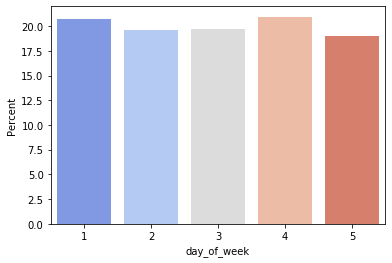

In [20]:
ax = sns.barplot(x="day_of_week", y="Accepts", data=Bank_Data, estimator=lambda x: len(x) / len(Bank_Data) * 100, palette = 'coolwarm')
ax.set(ylabel="Percent")

As we can see, there isn't a specific day of the week that has a significant probability to convert more.

[Text(0, 0.5, 'Percent')]

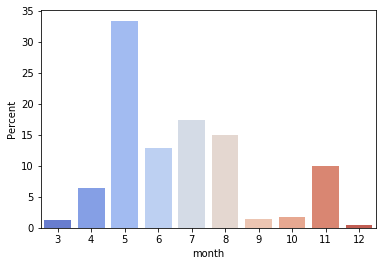

In [21]:
ax = sns.barplot(x="month", y="Accepts", data=Bank_Data, estimator=lambda x: len(x) / len(Bank_Data) * 100, palette = 'coolwarm')
ax.set(ylabel="Percent")

However, the month '5' (May) is the month responsible for over 30% of the total campaign success.

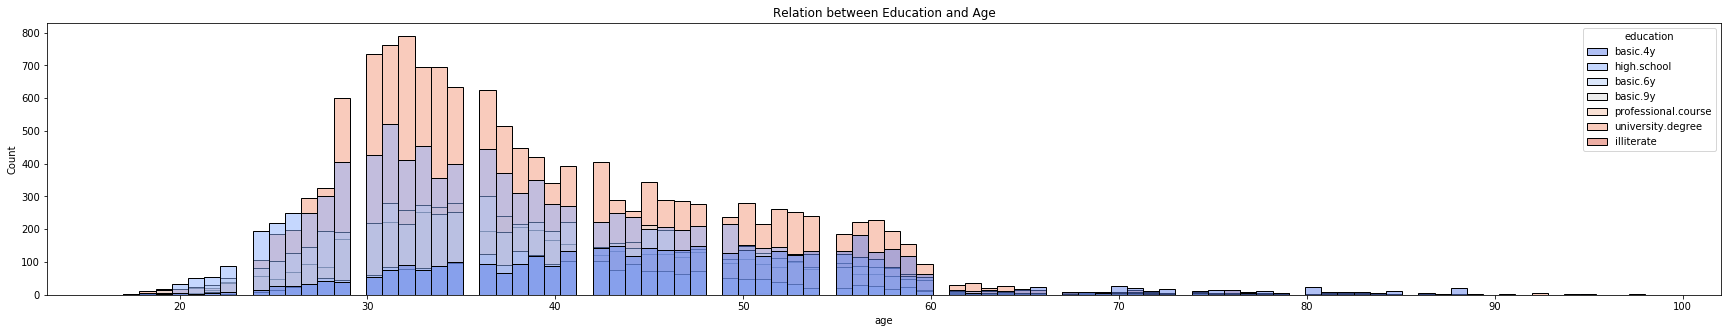

In [22]:
plt.figure(figsize = (30,5))
sns.histplot(x = 'age', data = Bank_Data ,hue='education' ,palette = 'coolwarm').set_title('Relation between Education and Age')
plt.show()

Here we can observe that the majority of the population has an university degree or at least high school, which means that this is a dataset in which the clients have high instruction regardless of their age.

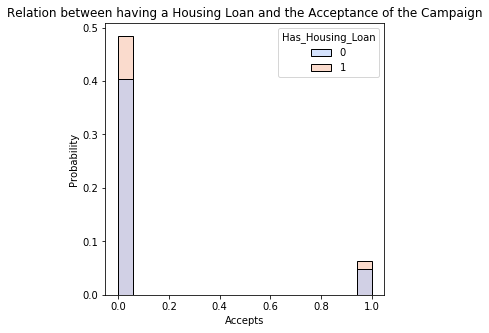

In [23]:
plt.figure(figsize = (5,5))
sns.histplot(x = 'Accepts', data = Bank_Data ,hue='Has_Housing_Loan' ,stat='probability', palette = 'coolwarm').set_title('Relation between having a Housing Loan and the Acceptance of the Campaign')
plt.show()

Here we can see that there's a high probability of someone that as a housing loan to reject the marketing campaign.

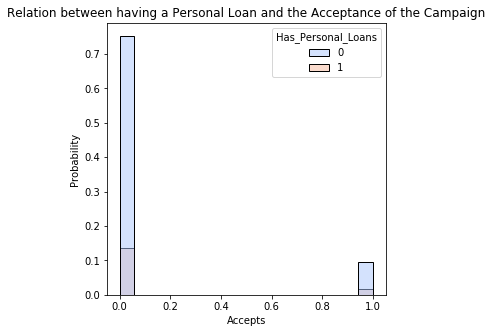

In [24]:
plt.figure(figsize = (5,5))
sns.histplot(x = 'Accepts', data = Bank_Data ,hue='Has_Personal_Loans' ,stat='probability', palette = 'coolwarm').set_title('Relation between having a Personal Loan and the Acceptance of the Campaign')
plt.show()

In a similar pattern, regarding the personal loans, we can see that not having one leads to a high probability of not accepting the campaign.

**[Q2]** How many observations are in the dataset

In [25]:
observations = Bank_Data.shape[0]
col = Bank_Data.shape[1]
numeric = Bank_Data.count(numeric_only=True).shape[0]
categorical = col-numeric
print("There are {} observations in the bank dataset and {} attributes. From these, {} are numeric and {} are categorical. Please bear in mind that this is after some modifications were done, as initially it had 10 numeric and 11 categorical.".format(observations, col, numeric, categorical))

There are 41188 observations in the bank dataset and 22 attributes. From these, 14 are numeric and 8 are categorical. Please bear in mind that this is after some modifications were done, as initially it had 10 numeric and 11 categorical.


## Understanding Variable Distribution

**[Q3]** What is the distribution of ages and education of clients?

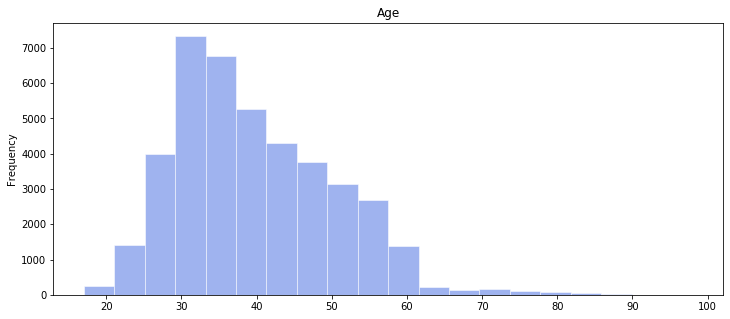

The average age is 40, the median is 38 and the most frequent age of the clients is 31. As mentioned earlier, the youngest client is 17 years old and the oldest is 98.


In [26]:
Bank_Data['age'].plot(kind='hist', figsize = (12,5), bins = 20, title = 'Age', alpha = 0.5, color = "royalblue", ec="white")
plt.show()
Age_Mean = int(Bank_Data['age'].mean())
Age_Median = int(Bank_Data['age'].median())
Age_Mode = int(Bank_Data['age'].mode())
Age_Min = int(Bank_Data['age'].min())
Age_Max = int(Bank_Data['age'].max())
print("The average age is {}, the median is {} and the most frequent age of the clients is {}. As mentioned earlier, the youngest client is {} years old and the oldest is {}.".format(Age_Mean, Age_Median, Age_Mode, Age_Min, Age_Max))

We can also see that most users have an age range between about 30-40 years.

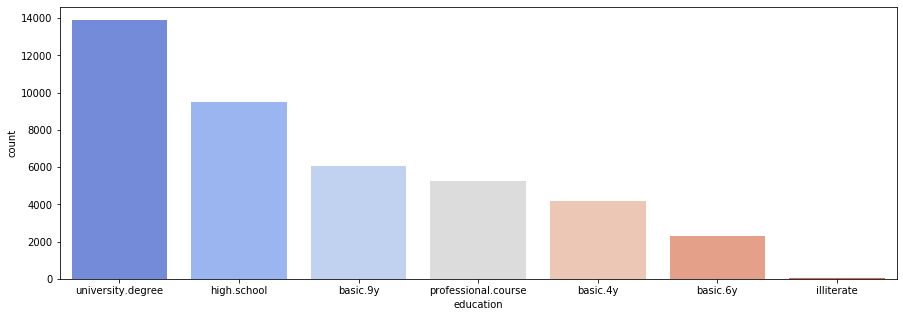

In [27]:
plt.figure(figsize = (15,5))
sns.countplot(x='education', data = Bank_Data, order = Bank_Data['education'].value_counts().index, palette = "coolwarm")
plt.show()

From what we can see, most of the users have an university degree, followed by high school and then basic 9y. There's also some residual amount of users that are 'illiterate'.

## Metrics of the Campaign

**[Q4]** What is the age of the youngest and oldest client that has the value celular in the feature contact?

In [28]:
contact_is_cellular =  Bank_Data['contact']=="cellular"
contact_cellular = Bank_Data[contact_is_cellular]
Min_Age_Cellular = contact_cellular['age'].min()
Max_Age_Cellular = contact_cellular['age'].max()
print("The youngest age of the client who has been contacted through a cellular is {} and the oldest is {}.".format(Min_Age_Cellular, Max_Age_Cellular))

The youngest age of the client who has been contacted through a cellular is 17 and the oldest is 98.


## Age Metrics by Marital Status

**[Q5]** What is the average, minimum, and maximum age of clients by marital status?

In [29]:
is_divorced =  Bank_Data['marital']=="divorced"
is_single =  Bank_Data['marital']=="single"
is_married =  Bank_Data['marital']=="married"
is_unknown =  Bank_Data['marital']=="unknown"
Bank_Data_divorced = Bank_Data[is_divorced]
Bank_Data_single = Bank_Data[is_single]
Bank_Data_married = Bank_Data[is_married]
Bank_Data_unknown = Bank_Data[is_unknown]


print('Divorced Mean Age:\t{}'.format(int(Bank_Data_divorced['age'].mean())))
print('Divorced Minimum age:\t{}'.format(Bank_Data_divorced['age'].min()))
print('Divorced Maximum Age:\t{}'.format(Bank_Data_divorced['age'].max()))
print('---------------------')
print('Single Mean Age:\t{}'.format(int(Bank_Data_single['age'].mean())))
print('Single Minimum age:\t{}'.format(Bank_Data_single['age'].min()))
print('Single Maximum Age:\t{}'.format(Bank_Data_single['age'].max()))
print('---------------------')
print('Married Mean Age:\t{}'.format(int(Bank_Data_married['age'].mean())))
print('Married Minimum age:\t{}'.format(Bank_Data_married['age'].min()))
print('Married Maximum Age:\t{}'.format(Bank_Data_married['age'].max()))

Divorced Mean Age:	44
Divorced Minimum age:	24
Divorced Maximum Age:	95
---------------------
Single Mean Age:	33
Single Minimum age:	17
Single Maximum Age:	86
---------------------
Married Mean Age:	42
Married Minimum age:	20
Married Maximum Age:	98


## Understanding Correlation

**[Q6]** Estimate the correlations between the existing numerical variables. What can you conclude? For instance, which variable(s) show a high/low correlations with the target (subscription of the product)?

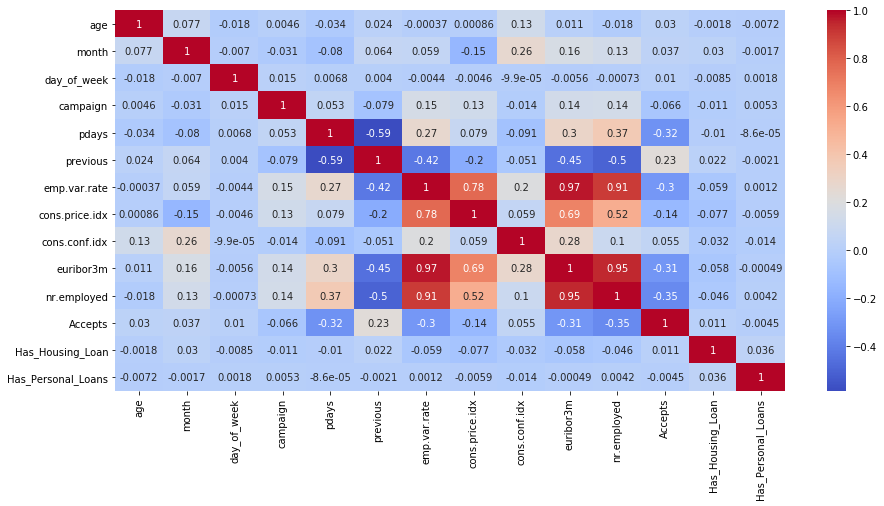

In [30]:
plt.figure(figsize = (15,7))
sns.heatmap(Bank_Data.corr(), annot = True, cmap='coolwarm')
plt.show()

### Strong Correlation Variables
From our heatmap we can observe that there are some highly correlated variables like:
Euribor3m and Nr.Employed | Emp.Var.Rate and Euribor3m | Emp.Var.Rate and Nr.Employed

This means that, for example, a user that has a higher volume of employees, will also enjoy a better euribor rate;
Also, a high employment rate will also translate into a better euribor rate;
In a similar fashion, a user that has a high employment rate is a user that has a higher volume of employees.

**We should drop the variables** 'Euribor3m' and 'Emp.Var.Rate' as Nr.Employed is able to provide approximately the same type of information and has higher correlation with the target variable that the remaining.

### Low Correlation Variables
Age and Accepts | Duration and Nr. Employees | Duration and Cons.Conf.index

This means that age has low correlation with the acceptance of the campaign;
Just like duration of the conversation with the number of employees;
And the duration has also a low correlation with consumer confidence index.

In [31]:
cols_to_drop_Bank_Data_3 = ['euribor3m', 'emp.var.rate']
Bank_Data.drop(columns =cols_to_drop_Bank_Data_3, inplace = True)

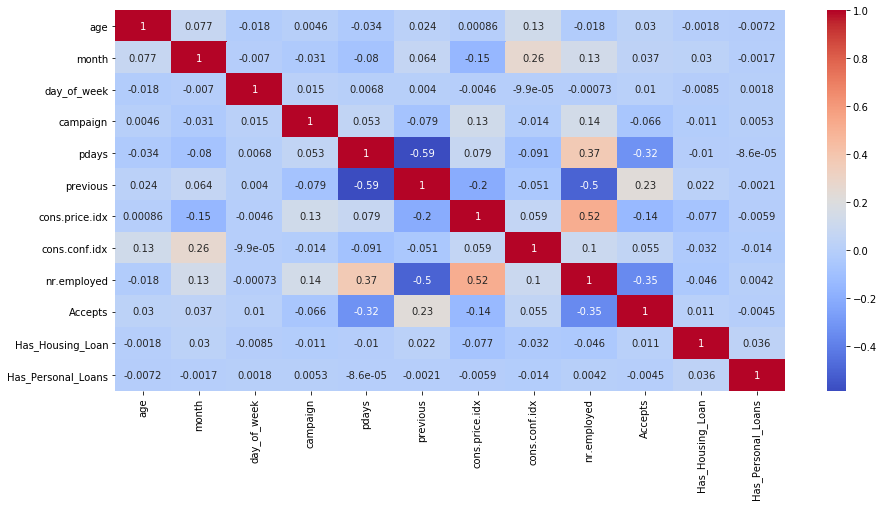

In [32]:
plt.figure(figsize = (15,7))
sns.heatmap(Bank_Data.corr(), annot = True, cmap='coolwarm')
plt.show()

## Correlation with the Subscription of the Product

There aren't variables that hold a strong positive or negative relationship with the acceptance of the product 'Accepts'.

We can see that variables like 'age' or 'month' have very low correlation values, which indicates that the age of the client and the day of the week has no correlation with the acceptance of the product.

However, 'nr.Employed' and 'pdays' have some negative correlation with 'Accepts' meaning that the higher the number of employees and the number of days that passed by after the client was last contacted from a previous campaign, the less correlation there will be with the acceptance of the product.

## Campaign Success

**[Q7]** What is the percentage of success of the campaign? Estimate the success by comparing the number of subscribers with the total number of clients reached during the phone campaign.

In [33]:
Success = round(((Bank_Data['Accepts'] == 1).sum())/ Bank_Data.shape[0] * 100,2)

print("The percentage of success of the campaign is {}%".format(Success))

The percentage of success of the campaign is 11.27%


## Typical Contact Types

**[Q8]** What is the typical contact type by marital state and job?

In [34]:
Bank_Data.pivot_table(values = 'y', index = ['marital', 'job'], columns = ['contact'], aggfunc = 'count', fill_value= 0)

contact                 cellular  telephone
marital  job                               
divorced admin.              845        448
         blue-collar         371        357
         entrepreneur        115         64
         housemaid            96         65
         management          196        135
         retired             244        104
         self-employed        88         45
         services            307        225
         student               8          1
         technician          564        210
         unemployed           74         50
married  admin.             3618       1892
         blue-collar        3614       3087
         entrepreneur        607        467
         housemaid           473        307
         management         1362        730
         retired             929        350
         self-employed       558        351
         services           1296       1004
         student              27         15
         technician         2393       1289
         unemployed          382        257
single   admin.             2831       1118
         blue-collar        1105        720
         entrepreneur        133         70
         housemaid            71         48
         management          344        157
         retired              58         35
         self-employed       247        132
         services            708        429
         student             636        188
         technician         1680        607
         unemployed          164         87

As we can see, the most usual contact type for all kinds of marital status and jobs is 'cellular'.

## Prominence of Job Type

**[Q9]** What is the relative number of clients per job?

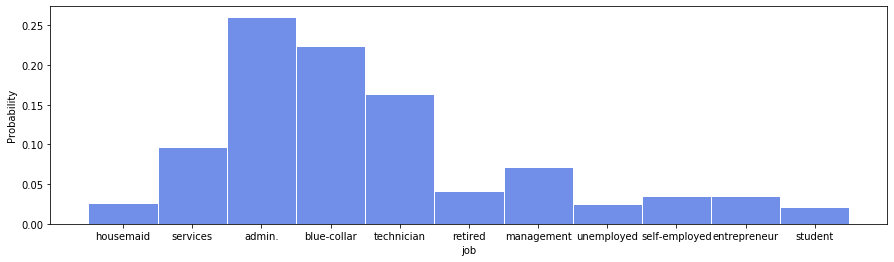

In [35]:
plt.figure(figsize = (15,4))
sns.histplot(x='job', data=Bank_Data,stat='probability', color = "royalblue", ec="white")
plt.show()

The following values correspond to the percentage of people who develop each job function.

From what we can see, admin is the predominent function among the clients of this bank, corresponding to over 25% of the total percentage. After that, we have blue-collar and technician with about 22% and 16%, respectively. The job that has the least occurences is 'student'.

## Age Metrics by Marital Status and Contact Type

**[Q10]** What is the average age of clients by marital state and contact type?

In [36]:
Bank_Data.pivot_table(values = 'age', index = ['marital'], columns = ['contact'], aggfunc = 'mean')

contact,cellular,telephone
marital,,
divorced,45.211829,44.366197
married,42.775936,41.556775
single,32.686975,34.206628


Those that are 'divorced' or 'married' and are contacted through a 'cellular' have an average age that is higher than those that have the same marital status and are contacted through a 'telephone'. The inverse thing happens when the marital status is 'single'.

## Next Steps

**[Q11]** If you were asked to study this dataset and develop a model to aid in the next phone campaign of the same Bank, which approach would you follow? <br>
__Provide a discussion, the question does not require any further programming or analytics.__

In order to optimize the results of this campaign and to set priorities to the contact center, I would develop a cluster analysis so that we could understand which is the typical profile of those that are more likely to accept a marketing campaign like the one that we are studying, so that we could focus our attention on those leads. Maybe phone campaigns don't work as well for younger audiences as it does for older ones - we need to find out.

The idea would be to have 'Accepts' as the target variable and test the impact of dependent variables like 'nr.employed' or 'pdays' (After being normalized). With this, maybe it would be possible to understand that clients that have Small/Medium Enterprises may be clients that are more likely to accept this product than those that work for large corporations. 

The process would be the following:
1) Normalize the data as the clustering algorithms uses distance to understand the position of the centroids;
2a) Use Elbow plot if using the KMeans approach to understand the number of clusters to use;
2b) Develop a Dendogram to identify the number of clusters if using the Hierarchical Clustering;
3) Understand the profile of each cluster through visualizations;
4) Compare the results of the different approaches.

It would also be interesting to do a linear regression on the data, so that we could understand which are typical attributes that lead to a higher conversion rate. With this, we could develop a phone script that would be consistent and bullet-proof.

In this case, the process would be:
1) Identify the target variable, in this case 'Accepts';
2) Clean the data so that the dataset only has independent variables that aren't highly correlated with one another, but there are correlated with the target variable;
3) Create X and Y variables where X are the independent variables and Y the dependent;
4) Use Ordinary Least Squares to evaluate the model;
5) Understand how much the target variable is explained by the model through R-Squared;
6) See if the variables are statistically significant if their P-Value is less than 0,05;
7) Look into the table of the results to see the impact of each variable in the target variable.

Part I is done, let's move on!

## Part II - Supervised and Unsupervised Learning (35% | 7 points)

In the second part of the Practical Exam, you have to choose between one of two challenges. <br> 
The first involves the use of a regression model to obtain insights on which features help explain houses Sales prices. The second challenge asks you to perform the clustering of an agnostic dataset and compare the results from K-Means with Hierarchical clustering algorithms.

__You are not required to solve both challenges.__ <br>
Instead, you have to choose one. However, your choice incurs in a cost. <br>
- If you choose to do the first challenge (II.1) it will require a bit more work, including data exploration due to a large number of features, but it will grant you the opportunity to obtain the full 7 points from Part II;<br>
- If you choose to do the second challenge, it will be slightly more straightforward as it is not necessary data exploration, but you will only be able to achieve a maximum of 5 points from Part II. <br>

Delete the cells from the challenge (II.1 ) or (II.2) that you do not want to count for grading. <br>
If you leave both we will only grade II.2 <br>

### II.1 - Supervised Learning (7 points)

In this task we ask you to use a **multi-linear regression model** to invesgate which variables are better predictors of the Sale Price of a house. <br> The dataset includes 81 features from 2919 sales. <br>

Let's start by downloading the data files to your computer. You can do that by running the cell below.

In [37]:
r = requests.get('https://www.dropbox.com/s/1fcws6aaodry54n/partii.zip?dl=1', allow_redirects=True)
open('partii.zip', 'wb').write(r.content);
with ZipFile('partii.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

You have downloaded two files to your computer. <br>
The data is in a .csv file with the name "house_dataset", but there is also an auxiliary .txt file with the name "house_dataset_description" that provides a short description of all features in the dataset. <br>
The target for the regression is the variable SalePrice. <br>

Load the file to a pandas dataframe.<br>

In [38]:
path2 = r"C:\Users\Diogo\Documents\NOVA IMS\DS4M\Exame\partii\house_dataset.csv"
House_Data = pd.read_csv(path2)

Perform the necessary Data Exploration to get an intuition about your data. 

**[Q1]** Identify and select a small group, of at most 8 features, that you believe can be relevant in explaining the SalePrice. Support your choice with data analysis, but beware that the choice might include some degree of **subjectivity**, which can be done visually or through analytics but also by reasoning if you have knowladge of the topic. <br>

A good starting point is to try to answer the following questions:<br>
- Are there missing values? How should you handle those situations? <br>
- How many variables do you have of each type (numeric and categoric)?<br>
- Are there relevant categoric variables that require a transformation/encoding before modeling? <br>
- Are there features that require normalization in order to make them comparable for modelling?<br>
- How do variables correlate with each other?<br>

__These are just guidelines, you don't need to explicitly answer them.__<br>

Do the data exploratory and pre-processing steps below. <br>
Then, write a summary of what you have learned with it, and how it helped support your feature selection and data cleaning (e.g., transformations, normalization, filtering, etc). 

**Notes**<br>
- Report just the necessary python code to reproduce your relevant analysis, and be selective in what you show. Showing more can be worse than just selecting the necessary insights or analysis to support your answers and decisions. <br>
- Be objective in your reporting, don't write a master thesis; <br>
- Use data visualization as a way to communicate your findings (one image is worth one thousand words) <br>
- Document carefully all your code, and the rationale behind each step. <br>

# Let's start the Quest to find the right variables:

## 1. Irrelevant Columns

In [39]:
cols = [0,1]
House_Data.drop(House_Data.columns[cols], axis =1, inplace = True)

Removing the first column that is an index, but we can use ID as an index.

## 2. Setting the Index as the first Column

In [40]:
House_Data.set_index('Id', inplace = True)

## 3. Delete all Rows with no Target Variable

In [41]:
House_Data.dropna(subset = ['SalePrice'], inplace = True)

As the objective is to understand the impact of variables on the target value (SalePrice), it doesn't make sense to use data that doesn't have values on the that variable, as it will provide us a biased vision of the impact of each variable on Sale Price.

## 4. Understanding Missing Values

In [42]:
percent_missing = House_Data.isna().sum() * 100 / House_Data.shape[0]
missing_value_House_Data = pd.DataFrame({'column_name': House_Data.columns,
                                 'percent_missing': percent_missing})

missing_value_House_Data.sort_values('percent_missing', inplace=True, ascending = False)

missing_value_House_Data.head(10)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


As we can see, there's a lot of variables that have more than 10% of missing values, so those variables should be droped:

In [43]:
cols_to_drop_House_Data = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
House_Data.drop(columns = cols_to_drop_House_Data, inplace = True)

## 5. Understanding which Numeric variables are correlated with Target Variable

In [44]:
corr_over_50percent = House_Data.corr()['SalePrice'].abs().sort_values(ascending = False)
corr_over_50percent[corr_over_50percent>=.5]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Since OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd are  highly correlated with the target variable, we will keep these numerical variables for now and remove the remaining.

In [45]:
cols_to_drop_House_Data_2 = ['2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'GarageYrBlt', 'HalfBath', 'LowQualFinSF', 'MSSubClass', 'OverallCond', 'ScreenPorch', 'WoodDeckSF', 'YrSold', 'KitchenAbvGr', 'LotArea', 'MiscVal', 'MoSold', 'PoolArea']
House_Data.drop(columns =cols_to_drop_House_Data_2, inplace = True)

## 6. Remove Numeric Independent Variables that are very correlated between themselves and that don't have a high correlation with SalePrice:

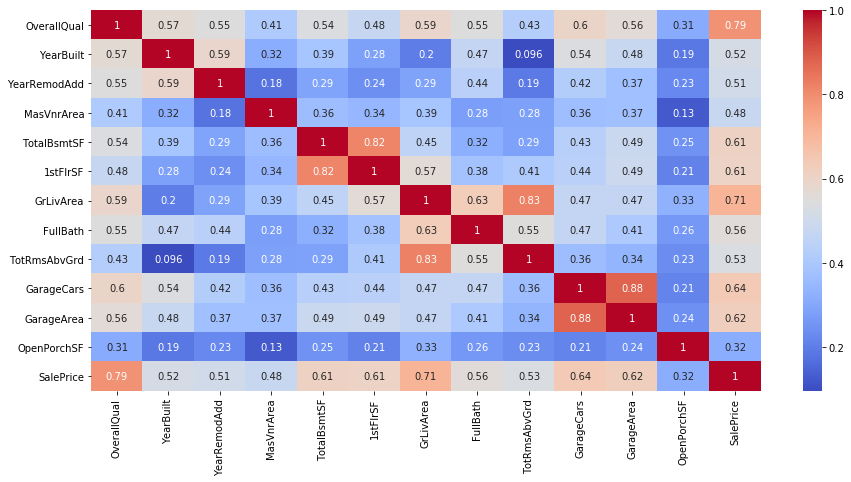

In [46]:
plt.figure(figsize = (15,7))
sns.heatmap(House_Data.corr(), annot = True, cmap='coolwarm')
plt.show()

GarageArea is very correlated with GarageCars | GrLivArea is very correlated with TotRmsAbvGrd | 1stFlrSF is very correlated with TotRmsAbvGrd - we will keep the ones with highest correlation with the target variable;

SalePrice has the least correlation with MasVnrArea, OpenPorchSF and YearRemodAdd.

In [47]:
cols_to_drop_House_Data_3 = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'YearRemodAdd', 'OpenPorchSF', 'MasVnrArea']
House_Data.drop(columns =cols_to_drop_House_Data_3, inplace = True)

## 7. Removing Categorical Variables based on Market Knowledge

In [48]:
cols_to_drop_House_Data_4 = ['BldgType','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir','Condition1', 'Condition2' ,'Electrical','Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation','GarageFinish', 'GarageType', 'Heating', 'HeatingQC', 'Foundation', 'Heating','PavedDrive', 'LotConfig', 'LotShape', 'Street', 'Utilities', 'RoofMatl', 'MasVnrType', 'MSZoning', 'RoofStyle', 'LandContour', 'LandSlope', 'Functional', 'GarageQual', 'GarageCond', 'ExterCond', 'HouseStyle', 'SaleCondition', 'SaleType']
House_Data.drop(columns =cols_to_drop_House_Data_4, inplace = True)

## 8. Transforming Categorical Variables into Numeric:

### - KitchenQual

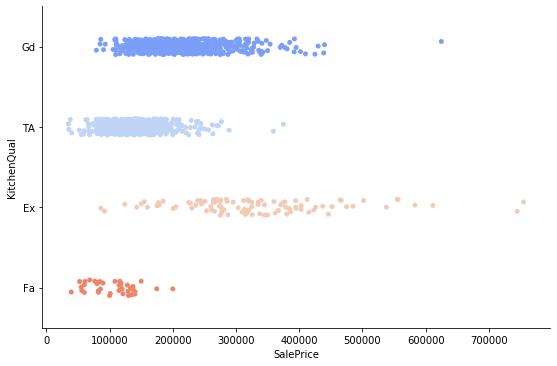

In [49]:
y = sns.catplot(x="SalePrice", y="KitchenQual", data=House_Data, palette = "coolwarm")
y.fig.set_size_inches(8,5)

As we can see, kitchens that are evaluated as 'Gd' or 'Ex' have a higher SalePrice, so we will create a variable that captures when the houses have those characteristics:

In [50]:
House_Data['KitchenTop'] = 0
House_Data.loc[House_Data['KitchenQual'].isin(['Gd', 'Ex']), 'KitchenTop'] = 1

### - Neighborhood

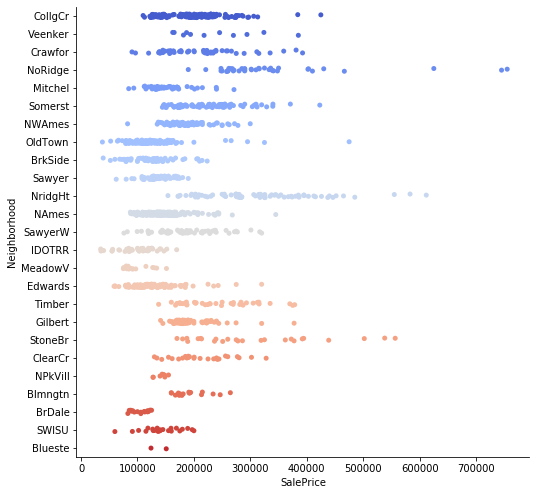

In [51]:
g = sns.catplot(x="SalePrice", y="Neighborhood", data=House_Data, palette = "coolwarm")
g.fig.set_size_inches(8,7)

There are neighborhoods that have a range of Saleprice that is higher than the remainder: NoRidge, NridgHt, StoneBr, Timber, Veenker and Somerst, so we will create a variable that captures when the house is near any of those neighborhoods:

In [52]:
House_Data['Imp_Neighborhoods'] = 0
House_Data.loc[House_Data['Neighborhood'].isin(['NoRidge','NridgHt','StoneBr','Timber','Veenker','Somerst']), 'Imp_Neighborhoods'] = 1

Now we drop the 2 categorical variables as they aren't relevant any longer.

In [53]:
cols_to_drop_House_Data_5 = ['KitchenQual','Neighborhood']
House_Data.drop(columns =cols_to_drop_House_Data_5, inplace = True)

## 9. Let's look into the correlation between the chosen features and the target variable:

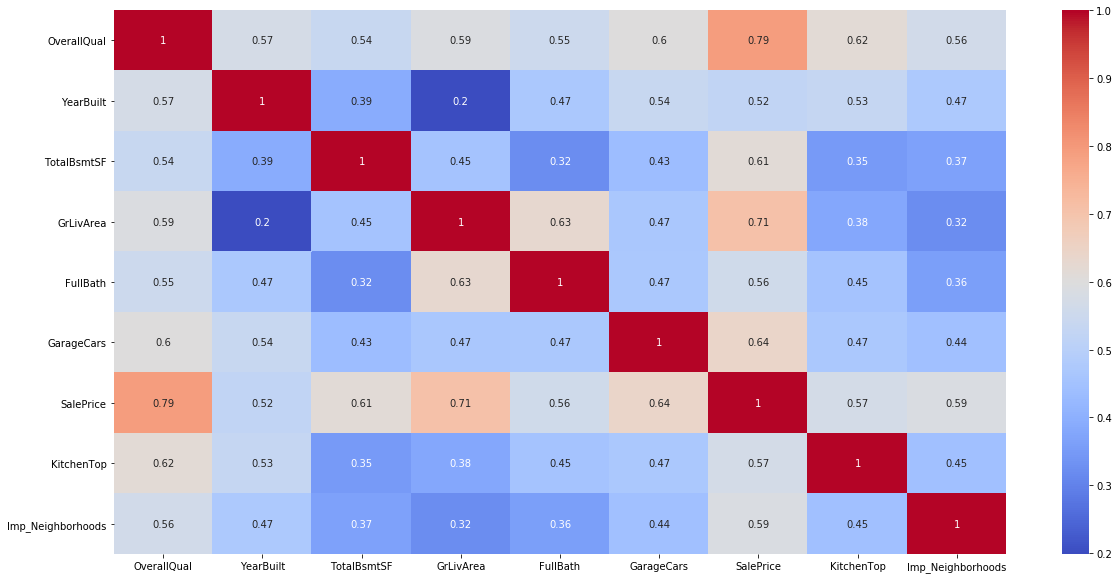

In [54]:
plt.figure(figsize = (20,10))
sns.heatmap(House_Data.corr(), annot = True, cmap='coolwarm')
plt.show()

As we can see, all of the features that were chosen have a correlation that is above 0.5, meaning that they will probably have some kind of significant impact on the SalePrice.

## 10. Visualizing the impact of each independent variable chosen in the target variable

### - OverallQual & SalePrice

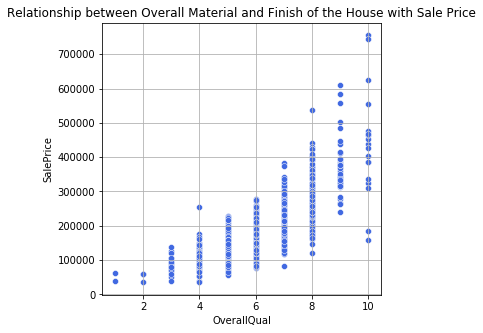

In [55]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'OverallQual', y='SalePrice', color = "royalblue")
plt.title('Relationship between Overall Material and Finish of the House with Sale Price')
plt.grid()
plt.show()

From what we can see, there's a positive relationship between the overall quality rating of the material and finish of the house, meaning that when a house has a higher grade, its' sale price increases aswell. This is better seen in the next graph where the blue colours represeting lower quality evaluation are present for lower prices whereas brownish colours have higher prices.

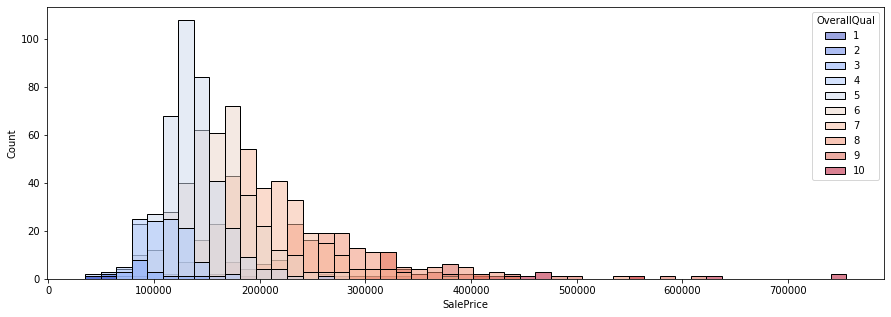

In [56]:
plt.figure(figsize = (15,5))
sns.histplot(data=House_Data, x="SalePrice", hue="OverallQual", palette ="coolwarm")

### - YearBuilt & SalePrice


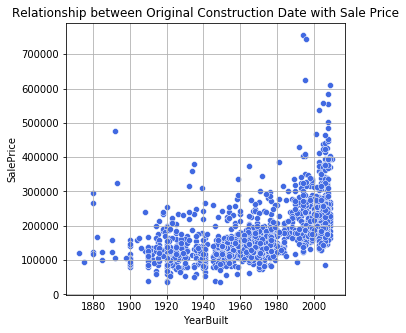

In [57]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'YearBuilt', y='SalePrice', color = "royalblue")
plt.title('Relationship between Original Construction Date with Sale Price')
plt.grid()
plt.show()

As it is possible to see, houses that have been built in the 21st century they typically assume values higher than those built before.

### - TotalBsmtSF & SalePrice


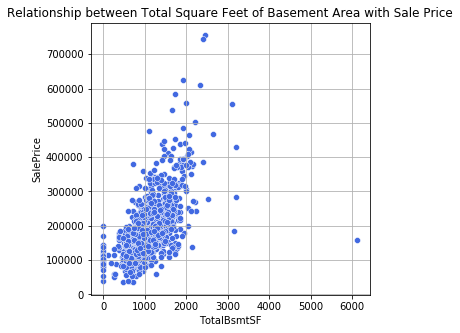

In [58]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'TotalBsmtSF', y='SalePrice', color = "royalblue")
plt.title('Relationship between Total Square Feet of Basement Area with Sale Price')
plt.grid()
plt.show()

Houses that have 0 square feet of basement area, meaning that don't have a basement, only have a sale price that ranges between about 50.000 dollars and 200.000 dollars whereas when the value of the squarefeet increases, their value also gets higher.

### - GrLivArea & SalePrice

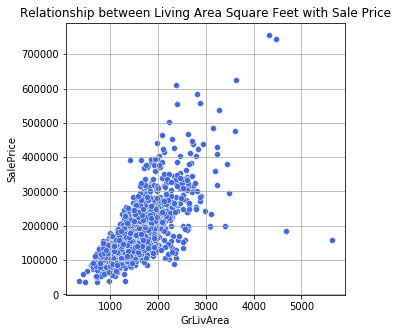

In [59]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'GrLivArea', y='SalePrice', color = "royalblue")
plt.title('Relationship between Living Area Square Feet with Sale Price')
plt.grid()
plt.show()

The higher the amount of square feet of the living area, the higher the sale price tends to be.

### - FullBath & SalePrice

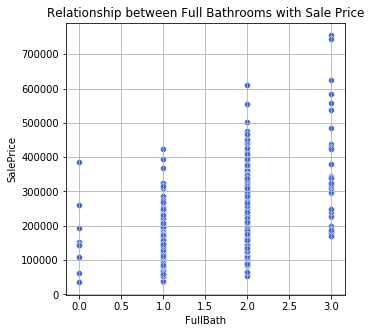

In [60]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'FullBath', y='SalePrice', color = "royalblue")
plt.title('Relationship between Full Bathrooms with Sale Price')
plt.grid()
plt.show()

There are only a few houses that don't have a full bathroom, but one can see that as the number of full bathrooms increase, their value also increases.

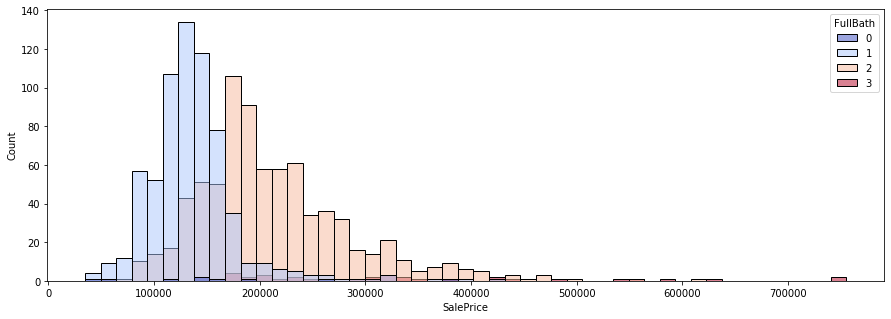

In [61]:
plt.figure(figsize = (15,5))
sns.histplot(data=House_Data, x="SalePrice", hue="FullBath", palette ="coolwarm")

This graph allows a better representation of that situation, as houses that have 1 bathroom assume a price range between about 50.000 dollars and 250.000 dollars whereas does that have 2 or 3 bathrooms go from 90.000 dollars up to 700.000 dollars.

### - GarageCars & SalePrice

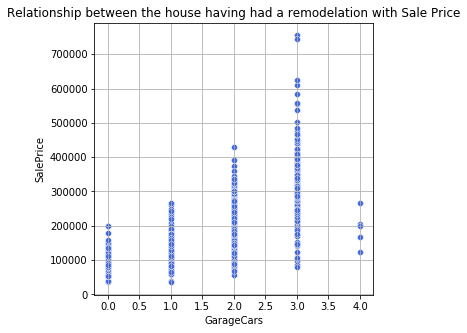

In [62]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'GarageCars', y='SalePrice', color = "royalblue")
plt.title('Relationship between the house having had a remodelation with Sale Price')
plt.grid()
plt.show()

A house that has a garage that has the capacity to have 2 or 3 cars is more expensive than one than can only have 1 car or that doesn't have a garage at all. This is also reflected in the following graph:

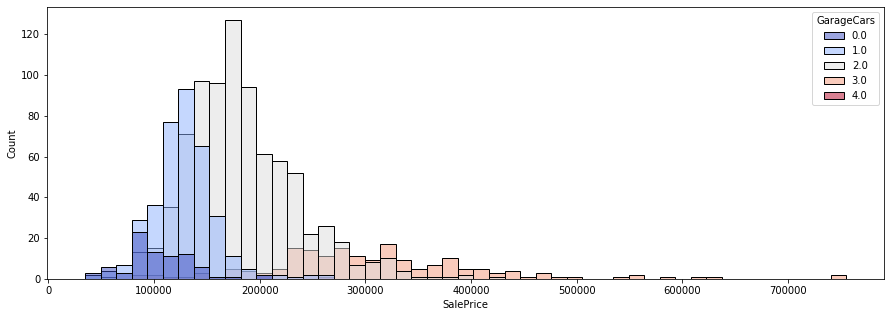

In [63]:
plt.figure(figsize = (15,5))
sns.histplot(data=House_Data, x="SalePrice", hue="GarageCars", palette ="coolwarm")

### - Great Kitchens & SalePrice

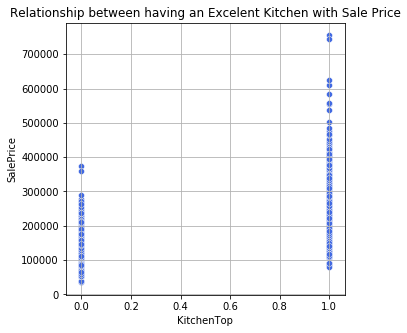

In [64]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'KitchenTop', y='SalePrice', color = "royalblue")
plt.title('Relationship between having an Excelent Kitchen with Sale Price')
plt.grid()
plt.show()

This is a binary variable that has been created to understand that when a kitchen is excellent 'Ex' or good 'Gd' (X = 1) the SalePrice is much higher than when it isn't. When it isn't, the range of the price goes from 50.000 dollars to about 350.000 dollars, and when the Kitchen is Good or Excellent, it goes from 90.000 dollars to above 700.000 dollars.

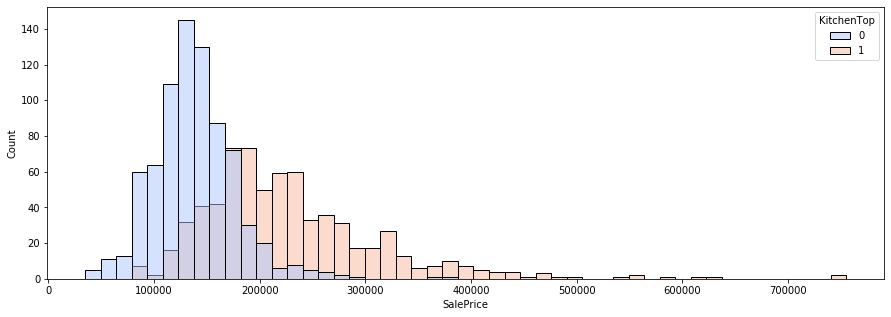

In [65]:
plt.figure(figsize = (15,5))
sns.histplot(data=House_Data, x="SalePrice", hue="KitchenTop", palette ="coolwarm")

### - Important Neighborhoods & SalePrice

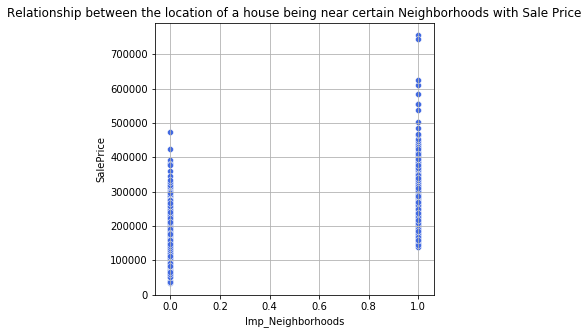

In [66]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = House_Data, x = 'Imp_Neighborhoods', y='SalePrice', color = "royalblue")
plt.title('Relationship between the location of a house being near certain Neighborhoods with Sale Price')
plt.grid()
plt.show()

When a house is within Ames city limits of NoRidge, NridgHt, StoneBr, Timber, Veenker and Somerst, the SalePrice tends to be higher than when it isn't.

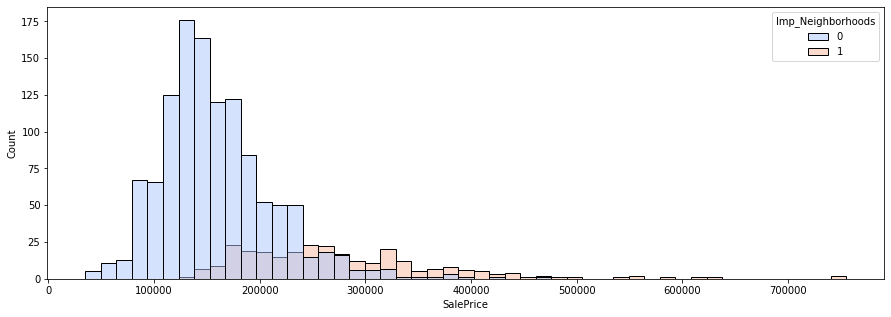

In [67]:
plt.figure(figsize = (15,5))
sns.histplot(data=House_Data, x="SalePrice", hue="Imp_Neighborhoods", palette ="coolwarm")

## 11. Do we Require Normalization?

Linear Regression doesn't require normalization because it looks into each variable independently and understands' its' impact on the target variable. 

## 12. How many variables do we have on our model of each type?

In [68]:
numeric = House_Data.count(numeric_only=True).shape[0]
categorical = col-numeric
print("There are {} numeric variables where one of them is the target Variable 'SalePrice' and {} are categorical which are the specific values of 'KitchenTop' and 'Imp_Neighborhoods'.".format(numeric, categorical))

There are 9 numeric variables where one of them is the target Variable 'SalePrice' and 13 are categorical which are the specific values of 'KitchenTop' and 'Imp_Neighborhoods'.


## Multi-Linear Regression

Use a multi-linear regression model to answer the following questions: <br>
**[Q2]** Which of the 8 selected features helps to explain the SalePrice? <br>

## Importing the Formulas

In [69]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

## Creating X and Y Variables and using Ordinary Least Squares

In [70]:
x = House_Data[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GrLivArea', 'GarageCars', 'KitchenTop', 'Imp_Neighborhoods']]
y = House_Data[['SalePrice']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

X will be correspondent to all the independent variables and Y the dependent variable 'SalePrice'.

By using the Ordinary Least Squares method we can get access to important metrics like R-Squared, P-Value and their Coefficient to understand each variable's impact on the target variable:

In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     674.7
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:58:25   Log-Likelihood:                -17411.
No. Observations:                1460   AIC:                         3.484e+04
Df Residuals:                    1451   BIC:                         3.489e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.915e+05   9.02e+0

Since all of the variables in the model reject the null hypothesis that the coefficient is 0, this means that all of them are statistically significant (because their p-value is less than 0,05).

This model tells us that the better the evaluation of the finish and the material of the house, the higher the sale price;

The older the year in which the building has been built, the higher the price;

The higher the amount of square feet of the basement the higher the price;

Increasing the amount of Full Baths will diminish the house price;

The number of square feet of the living area affects positively the sale price;

Just like the dimension of the garage, measured by car capacity will also lead to an increase of the sale price;

Having a kitchen that is graded as 'good' or 'excellent' increases the valuation of thouse;

Finally, being close to NoRidge, NridgHt, StoneBr, Timber, Veenker and Somerst will lead to higher prices.

**[Q3]** How well does the model perform in explaining the Sale Price? <br>

By looking at the 'R-squared' metric, we can understand that the model composed by the 8 independent features chosen explains 78,8% of the variance of the target variable 'SalePrice'.

**[Q4]** If you are planning to put your house on sale, which feature of your data you should renovate in order to maximize your Sale Price? (you can ignore the renovation cost in this analysis)

**Notes:**
Check the p-values associated with the coefficients of each variable/feature to identify which are the relevant features in your model. For this task, consider using the package _Statsmodel_.

First we need to check the p-values of the variables. Since all of them assume a p-value < 0,05 this means that they are all statistically significant to explain the variance of the price of the houses sold.

After this, we need to check the individual impact of each variable on the house price. Since 'OverallQual' is the one with the highest coefficient, this means that if I were to put a house on sale, the feature that I would renovate would be the overall material and finish of the house.

According to the model developed, improving the 'OverallQual' by one grading point will lead to an increase of 15.700 dollars of the sale price, so my focus would be on renovating the material and finish of the house in order to maximize the Sale Price.

## Part III - A Short Data Science Project (40% | 8 points)

The third part of this exam requires a combination of the topics we discussed during the semester, in order to extract valuable insights and value from a dataset.<br>
Consider a dataset that contains personal information and shopping behavior details of over 2 000 customers at the _DS4MKT GOODS™_ store. To achieve better profitability and a data-driven decision-making, Management is considering the application of advanced analytics techniques.

<b>Perform the necessary steps in order to answer the following questions:</b><br>

**[Q1]** Develop a supervised learning model to identify which customers are more likely to accept a future campaign. Hint: Use the result of the last campaign (#6 - Response) as the target variable. <br>
**[Q2]** How good is your model? Is it robust to unseen data? What are the most important characteristics to predict this response? What is the business viability of your model? <br>
**[Q3]** How would you segment the customers based on their product preferences, regardless of total ammount spent? Create a (short) marketing strategy for each one.<br>

__You are expected to support your answers with data, and analysis. It is also expected that you are able to go beyond the features already available in the dataset and create some new ones.__ However, you will not be granted extra points for unnecessary steps, or out of scope analysis. In that sense, be objective in what you do, to support your answer to the above questions.

Start by running the cell below in order to download the data files. <br>
The data files will be downloaded to ./DATA/ folder, which is located the same folder as this notebook. <br>
The files include an excel document "goods_data.xlsx" with the data, and a .txt file with a short description of the dataset.

In [72]:
r = requests.get('https://www.dropbox.com/s/h7v25van21pjaj7/partiii.zip?dl=1', allow_redirects=True)
open('partiii.zip', 'wb').write(r.content);
with ZipFile('partiii.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

In [73]:
path3 = r"C:\Users\Diogo\Documents\NOVA IMS\DS4M\Exame\partiii\goods_data.xlsx"
Goods_Data = pd.read_excel(path3)

# Exploratory Data Analysis & Data Cleaning

## Using ID as the Index

In [74]:
Goods_Data.set_index('ID', inplace = True)

Using the ID as the unique identifier of the client.

## Understanding the Data Types of the Variables and their Meaning

In [75]:
Goods_Data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

From what we can see the majority of the variables are numeric but 'Education', 'Marital_Status' and 'Dt_Customer' which are objects.

In this dataset we have variables that are related to **demographics and income** like:
- 'Year_Birth' which is the year in which the date the customer was born;
- 'Education' that represents the highest education level obtained;
- 'Marital_Status' that tells the marital status of the client;
- 'Kidhome' if the client has kids;
- 'Teenhome'if the client has adolescents;
- 'Income' gives us the customers' yearly household income;

There's variables related to the **amount of product categories** bought:
- 'MntWines' Amount spent on wines in the last 2 years;
- 'MntFruits' Amount spent on fruits in the last 2 years;
- 'MntMeatProducts' Amount spent on meat products in the last 2 years;
- 'MntFishProducts' Amount spent on fish products in the last 2 years;
- 'MntSweetProducts' Amount spent on sweet products in the last 2 years;
-  Finally there's 'MntGoldProds Amount spent on gold products in the last 2 years;

We can also find variables related to **where the purchase happened**:
- 'NumDealsPurchases' that's the Number of purchases made with discount;
- 'NumCatalogPurchases' which is the Number of purchases made using catalogue;
- 'NumStorePurchases' gives us the Number of purchases made directly in stores;
-  And 'NumWebPurchases' that is the Number of purchases made through company’s web site;

It's also easy to understand the **attractivity of the brand** for the user through:
- 'Recency' that gives the Number of days since the last purchase;
- 'NumWebVisits' that says the Number of visits to company’s web site in the last month;
- 'Complain' that captures if a costumer complained in the last 2 years;

Finally, there's some **Marketing Metrics** like:
- 'AcceptedCmp1': if costumer accepted the offer in the 1st campaign;
- 'AcceptedCmp2': if costumer accepted the offer in the 2nd campaign;
- 'AcceptedCmp3': if costumer accepted the offer in the 3rd campaign;
- 'AcceptedCmp4': if costumer accepted the offer in the 4th campaign;
- 'AcceptedCmp5': if a costumer accepted the offer in the 5th campaign;
- 'Response': if a costumer accepted the offer in the last campaign;
- And 'Dt_Customer' - the Date of customer’s enrollment with the company;

'Z_CostContact' and 'Z_Revenue' are variables that gives us the cost and the revenue of the campaign;

## Describing the Variables

### Numeric Variables:

In [76]:
Goods_Data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Demographics and Income** 
- The oldest client in record was born in 1893 and the youngest in 1996. On average, the clients' typical birth age is 1969, so nowadays he/she would have 51 years;
- The poorest client has an yearly income of 1.730€ and the wealthiest has 666.666€. On average the yearly income is 52.247€;
- There are people that don't have kids at home, but the maximum is 2 kids;
- The same minimum and maximum values also occur on teens at home;

**Product Categories**
- In all categories, the minimum is 0, meaning that there's people that don't buy all product categories;
- The average money invested in buying Wine is 303€, but there's at least one person that has bought 1.493€ worth of wine;
- Fruit is a category that on average people spend 26€, while the maximum spent is 199€;
- Meat is also an expensive categories where people have spent on average approximately 167€, but the maximum is 1.725€;
- Fish has a mean value of 38€ and a maximum os 259€;
- Sweets is a product category with an average value of 27€ and a maximum of 263€
- People spend on average 44€ in gold products and a maximum of 362€;

**Place of Purchase**
- There are people who haven't ever bought through deals, but on average they buy 2 times through this source. The highest entry says that there was a user that bought 15 times through this method;
- Catalog is a method where people buy on average 3 times, and the highest amount has been 28 times;
- Store is the preferred source, since the average is about 6 times, but there's people that don't shop on the physical stores and the maximum amount of times has been 13 times;
- Web is 2nd source with highest mean since people buy online on average 4 times and the max value is 27;

**Atractivity**
- There's entries that register that there's no time between the day of last purchase and the day where the record has been inserted in the database and on maximum 99 days have passed. However, it takes people, on average, 49 days until they do another purchase;
- People visited on average the website 5 times in the last month, but there's people that haven't been to the website and other's that have been 20 times on maximum;
- There's people that have never complained and people that complained;

**Marketing Metrics**
- There's always people that have accepted and rejected the previous marketing campaigns, but the last campaign was the one with the highest mean of acceptance.

### Categorical Variables

In [77]:
Goods_Data.describe(include = 'O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


- Most of the clients have an education level of 'Graduation' and most of them are married;
- The day that had the highest amount of enrolment's was the 31st of August 2012.

## Transforming Variables

### Managing Nonsense Data:

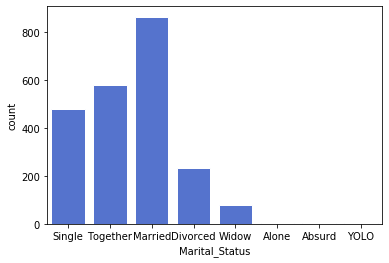

In [78]:
sns.countplot(x = 'Marital_Status', data = Goods_Data, color = "royalblue", ec="white")

Status like 'Alone', 'Absurd' and 'YOLO' don't make any sense, so we should drop the rows inserted by those customers, as the remaining data may be not correct.

In [79]:
Goods_Data.drop(Goods_Data.loc[Goods_Data['Marital_Status'] == 'Alone'].index, inplace=True)
Goods_Data.drop(Goods_Data.loc[Goods_Data['Marital_Status'] == 'Absurd'].index, inplace=True)
Goods_Data.drop(Goods_Data.loc[Goods_Data['Marital_Status'] == 'YOLO'].index, inplace=True)

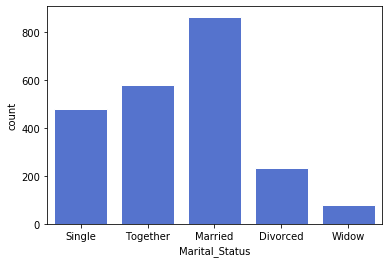

In [80]:
sns.countplot(x = 'Marital_Status', data = Goods_Data, color = "royalblue", ec="white")

Here we can confirm that 'married' is the most typical marital status.

### Creating New Variables

First we are going to change 'Dt_Customer' into a variable that captures the number of days that passed since the customer has enrolled with the company:

In [81]:
import datetime

now = datetime.datetime.now()

Goods_Data['Dt_Customer'] = pd.to_datetime(Goods_Data['Dt_Customer'])

Goods_Data['Days_as_customer'] = (now - Goods_Data['Dt_Customer']).dt.days

And understand the age of our customers:

In [82]:
import datetime

now = datetime.datetime.now()
currentYear = now.year
Goods_Data['Age'] = currentYear - Goods_Data['Year_Birth']

Merging Education levels corresponding to High Education:

In [83]:
Goods_Data['High_Educ'] = 0
Goods_Data.loc[Goods_Data['Education'].isin(['Graduation', 'Master', 'PhD']), 'High_Educ'] = 1

Transforming Categorical Variable 'Marital Status' through One-Hot-Encoding

In [84]:
dummies = pd.get_dummies(Goods_Data['Marital_Status'], prefix = 'MS', drop_first = True)

Goods_Data = pd.concat([Goods_Data, dummies], axis = 1)

## Understanding the Current Profit

In [85]:
revenue = Goods_Data['Z_Revenue'].median()
cost = Goods_Data['Z_CostContact'].median()

total_revenue = Goods_Data['Response'].sum() * revenue
total_cost = len(Goods_Data['Response']) * cost

profit = total_revenue - total_cost
print('profit: {} €'.format(profit))

profit: -3058.0 €


By looking into the results of the last campaign, we know that this campaign isn't really profitable as the profit was -3.058€.

## Dropping Irrelevant Campaigns 

In [86]:
cols_to_drop_3_1 = ['Z_Revenue', 'Z_CostContact', 'Year_Birth', 'Dt_Customer', 'Education', 'Marital_Status']
Goods_Data.drop(columns = cols_to_drop_3_1, inplace = True)
#Removing because they don't add value

## Dealing with Missing Values

First we will look into how many missing values there are in the dataset:

In [87]:
Goods_Data.isna().sum()

Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Response                0
Days_as_customer        0
Age                     0
High_Educ               0
MS_Married              0
MS_Single               0
MS_Together             0
MS_Widow                0
dtype: int64

As it is possible to see, there's only missing values in the variable 'Income'. Let's see the impact of those missing values in the total dataset:

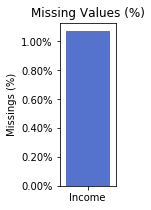

In [88]:
import matplotlib.ticker as mtick

Goods_Data_na = pd.DataFrame(Goods_Data.isna().sum()/Goods_Data.shape[0],
                        columns = ['Missings (%)']).sort_values(by = 'Missings (%)', ascending = False)
Goods_Data_na = Goods_Data_na[Goods_Data_na['Missings (%)'] > 0].copy()

plt.figure(figsize = (1,3))
ax = sns.barplot(data = Goods_Data_na, x = Goods_Data_na.index, y = 'Missings (%)', color = "royalblue", ec="white")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Missing Values (%)')
plt.show()

As we can see, there's only about 1% of missing values, so we shall deal with them through filling the missing values with either the mean or the median, let's find out:

In [89]:
Goods_Data['Income'].describe()

count      2209.000000
mean      52243.977818
std       25198.475858
min        1730.000000
25%       35246.000000
50%       51390.000000
75%       68627.000000
max      666666.000000
Name: Income, dtype: float64

In order to fill the missing values, it's better to use the median as 'Income' is a variable that a high standard deviation due to the outliers, so median will be used as the mean is metric that is highly influenced by the existence of outliers, whereas median isn't.

In [90]:
Goods_Data.fillna(Goods_Data.median(), inplace = True)

## Understanding the Correlation in the Variables:

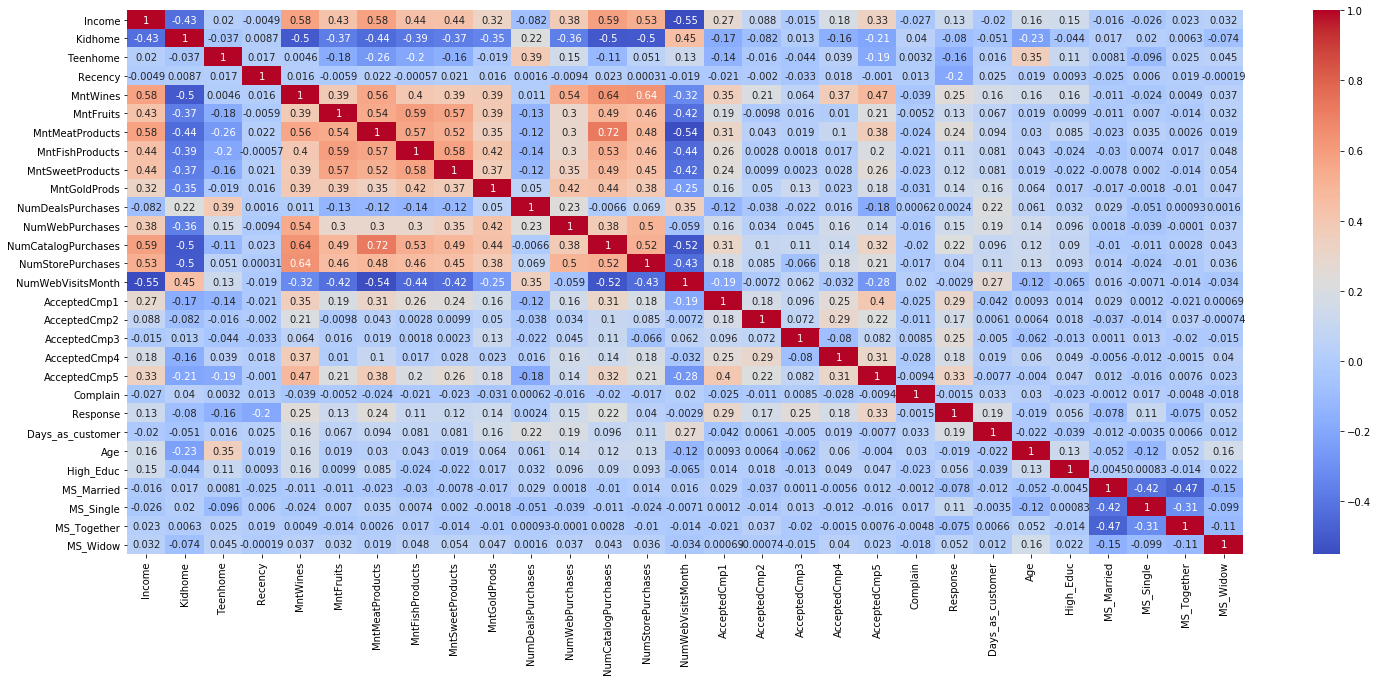

In [91]:
plt.figure(figsize = (25,10))
sns.heatmap(Goods_Data.corr(), annot = True, cmap='coolwarm')
plt.show()

As it's possible to see through the heatmap, there's no variable that is highly correlated with another as all correlation values are below 0.8.

## Exploring Relationships

### Between having Kids and Accepting the Campaign

[Text(0, 0.5, 'Response')]

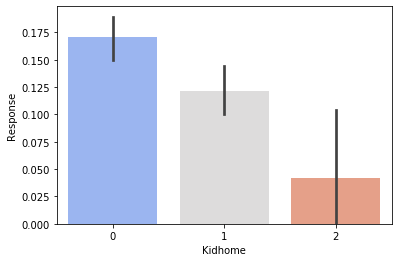

In [92]:
ax = sns.barplot(x="Kidhome", y="Response", data=Goods_Data, palette = 'coolwarm')
ax.set(ylabel="Response")

As we can see, people that don't have kids have more probability of accepting the last campaign.

### Between having Teens and Accepting the Campaign

[Text(0, 0.5, 'Response')]

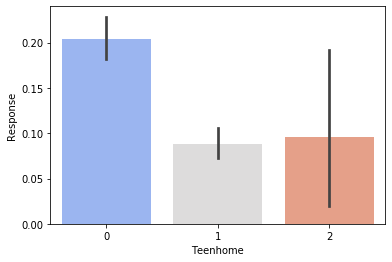

In [93]:
ax = sns.barplot(x="Teenhome", y="Response", data=Goods_Data, palette = 'coolwarm')
ax.set(ylabel="Response")

But there's over 20% of chance that when there's no teen at home of accepting the campaign.

### Between Accepting previous Campaigns and the latest

[Text(0, 0.5, 'Response')]

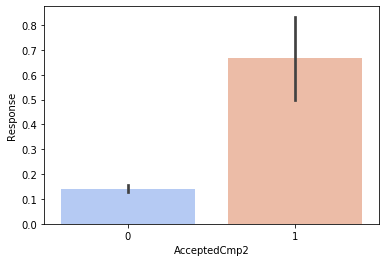

In [94]:
ax = sns.barplot(x="AcceptedCmp2", y="Response", data=Goods_Data, palette = 'coolwarm')
ax.set(ylabel="Response")

Accepting Campaign 2 also leads to a high probability of accepting the last campaign.

### Between having done a Complain and Accepting the Campaign

[Text(0, 0.5, 'Response')]

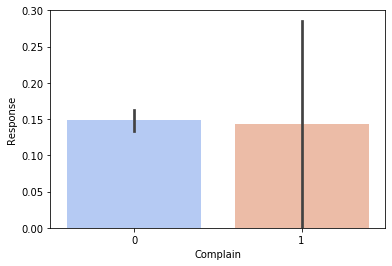

In [95]:
ax = sns.barplot(x="Complain", y="Response", data=Goods_Data, palette = 'coolwarm')
ax.set(ylabel="Response")

As surprising as it is, doing a complain has no impact in accepting the campaign when compared to users that haven't done a complaint.

### Understanding which products are consumed the most

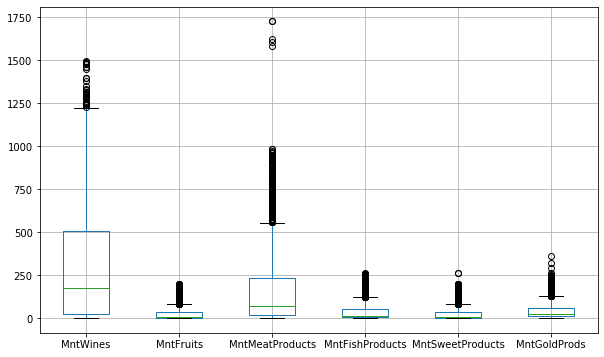

In [96]:
plt.figure(figsize = (10, 6))
Goods_Data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds']].boxplot()
plt.show()

As seen through the boxplot, wines are the products with the highest median, 75th quartile and maximum values. 
Meat is the product category with the highest value of outliers.
Fruits, Fish, Sweets and Gold are products that aren't as purchased as the other 2 mentioned.

### Understanding which Channel people use to buy the most

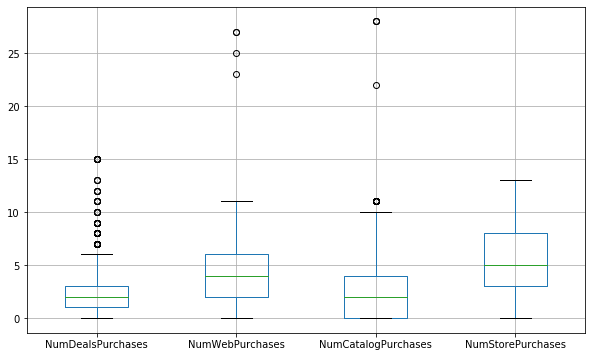

In [97]:
plt.figure(figsize = (10, 6))
Goods_Data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].boxplot()
plt.show()

As we can see, people buy mostly in Store on Online, but there's some outliers that buy a lot through Catalog.

## Spliting Data

In this exercise, we are dealing with a model that is meant to enter in production to predict future events, so we need to split the data in order to get a better understanding of the reality. We will be spliting that data where train will get 80% of data and 20% is meant for testing.

Since we are dealing with a binary classification problem, we will keep the same proportion of positive responses in each subset.

In [98]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
train, test = train_test_split(Goods_Data, stratify = Goods_Data['Response'], test_size = 0.2, random_state = 0)

The X variable will correspond to all independent variables, meaning that we will drop 'Response' and Y only has the target variable 'Response'.

All transformations that are done in the train subset will need to be replicated in 'test'.

In [99]:
x_train = train.drop(columns = ['Response'])
y_train = train['Response']

x_test = test.drop(columns = ['Response'])
y_test = test['Response']

## Normalize Data

Since we have features in different scales, we will normalize the data by using the Min-Max scaler that fits all values between 0 and 1 in the train and test subsets.

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns, index = x_train.index)

x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns, index = x_test.index)

## Model

### 1. The Old Way

Using the old method (sending the offer to every customer), we will estimate the profit that the testing subset would get.

In [101]:
y_pred = [1] * len(y_test)

In [102]:
def get_profit(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    profit = total_revenue - total_cost
    return profit

profit_old = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)
print('This is the total profit that we get by sending the offer to every customer: Total Profit = {} €'.format(profit_old))

This is the total profit that we get by sending the offer to every customer: Total Profit = -615.0 €


### 2. Logistic Regression

Now we will be looking into the logistic regression that helps to predict the probability of an event occurring. In this case, of the testing subset accepting the campaign.

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression(random_state = 0)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [105]:
profit_reg = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)
print('By using Logistic Regression, the Total Profit is: {} €'.format(profit_reg))

By using Logistic Regression, the Total Profit is: 253.0 €


### Let's Look into the Confusion Matrix to access the Performance of the Binary Classifier:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       381
           1       0.80      0.53      0.64        66

    accuracy                           0.91       447
   macro avg       0.86      0.75      0.79       447
weighted avg       0.90      0.91      0.90       447



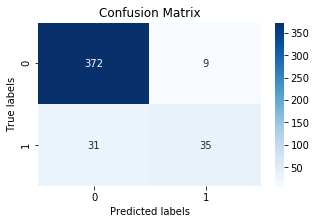

In [106]:
def print_classification(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
print_classification(y_test = y_test, y_pred = y_pred)

Through the Logistic Regression we can see that out of 66 positive occurrences, our model predicted accurately 35 of the times (True Positives) - meaning that it's recall is of 53%. Translating into the context of the business, it means that 53% of the times, the model can predict when a user will accept the marketing campaign accurately, but there are 47% of the times in which it thinks that a user won't accept, but he/she actually accepts. This is a metric that isn't harmful for the context of the problem, because there will be some revenue that will exist that wasn't expected, but it won't incur in aditional costs.

On the other hand, if we look at false positives - there was 9 times in which the model thought that a user would accept the campaign, but it actually didn't - this is something that is harmful for the campaign because there won't be revenue, only costs associated with it. Overall, the model predicted a positive response 44 times, but was only correct in 35 of those cases - meaning that the precision is 80%. This is something that should be optimized towards reducing the number of false positives.

We can also inspect the model's accuracy which, in this case, if of 92%, but it's heavily due to the model accurately understanding which users won't accept the campaign. 

## Now let's look into the importance of each feature to estimate the output:

In [107]:
def feature_importance(features, importance):
    df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
    df_importance['Impact'] = ['Positive' if x > 0 else 'Negative' for x in df_importance['Importance']]
    df_importance.sort_values(by = 'Importance', ascending = False, inplace = True)

    plt.figure(figsize = (6,8))
    sns.barplot(data = df_importance, x = 'Importance', y = 'Feature', hue = 'Impact', hue_order = ['Negative', 'Positive'])
    plt.title('Feature Importance')
    plt.show()

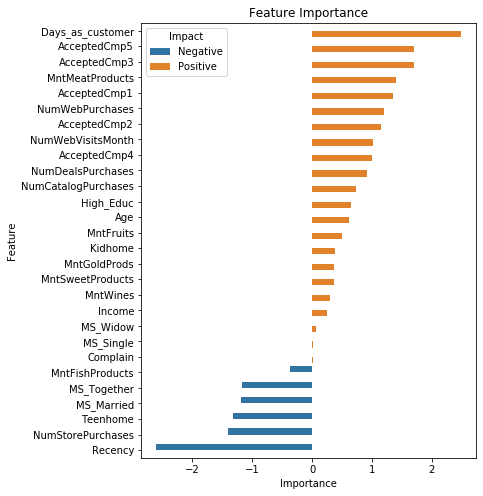

In [108]:
feature_importance(features = x_train.columns, importance = model.coef_[0])

As we can see through this model, the features that leads to a better understanding if a user will accept a campaign or not, will be:

**Positive Impact: Accepting the Campaign**:
- The number of days that has passed since the customer has enrolled with the company; 
- If he/she has accepted previously the 3rd and 5th campaign;

**Negative Impact: Rejecting the Campaign**
- The number of days that passed since the last purchase (Recency) will impact negatively their choice;
- With less importance, the number of times that a customer purchased in store.

## Comparing the 2 Approaches:

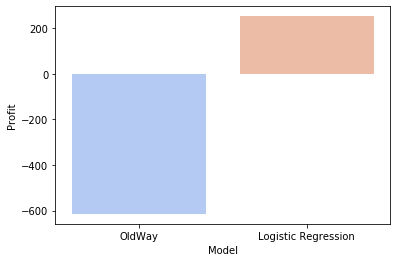

In [109]:
results = pd.DataFrame({'Model': ['OldWay', 'Logistic Regression'],
                        'Profit': [profit_old, profit_reg]})

sns.barplot(data = results ,x = 'Model', y = 'Profit', palette = 'coolwarm')
plt.show()

As we can see, the old approach of sending the campaign to everybody leads to a loss in revenue, whereas with logistic regression we have profit.

### 3. Decision Tree

Now we will use the decision tree to see the impact of this algorithm in the problem:

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
model = DecisionTreeClassifier(random_state=0)

model = model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [112]:
profit_reg = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)
print('By using Logistic Regression, the Total Profit is: {} €'.format(profit_reg))

By using Logistic Regression, the Total Profit is: 134.0 €


As we can see, the profit obtained through Decision Tress is less than when using the Logistic Regression, but let's look into the performance of the model:

## Importance of each feature to estimate the output - Decision Tree:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       381
           1       0.42      0.52      0.47        66

    accuracy                           0.83       447
   macro avg       0.67      0.70      0.68       447
weighted avg       0.84      0.83      0.83       447



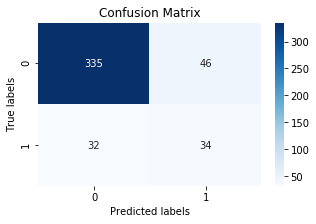

In [113]:
print_classification(y_test, y_pred)

In this case, the Decision Tree can access 30 positive occurences out of 66, meaning that the Recall metric is 45% - something that is good, but not the main concern.

The main concern relies on the Precision metric that in this case is 43%, as the model estimates 70 positive occurences, but it's only right in 30 of those times. This means that the model has less success in predicting accurately a positive response than in the previous model, resulting in lower profit.

In this model, the accuracy is 90%, but then again, it's heavily due to being albe to understand which users won't accept the campaign.

## Now let's look into the importance of each feature to estimate the output:

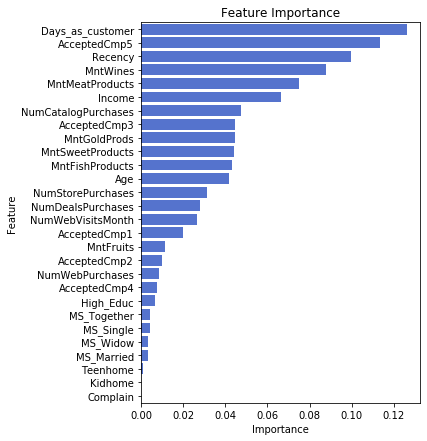

In [114]:
features = x_train_scaled.columns
importance = model.feature_importances_

df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
df_importance.sort_values(by = 'Importance', ascending = False, inplace = True)

plt.figure(figsize = (5,7))
sns.barplot(data = df_importance, x = 'Importance', y = 'Feature', color = 'royalblue')
plt.title('Feature Importance')
plt.show()

In this case, there are only variables that have a positive impact on estimating a positive response. The 5 most important variables are:

- The number of days that has passed since the customer has enrolled with the company;
- If he/she has accepted previously the 5th campaign;
- The number of days that passed since the last purchase (Recency);
- The amount of money spent on wines and meat.

### 4. Decision Tree (With the most Important Features)

Now we will be using a model that uses only 16 features as sometimes more variables are worse than having fewer variables.

In [115]:
cols = ['Days_as_customer', 'AcceptedCmp5', 'Recency', 'MntWines', 'MntMeatProducts', 'Income', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'Age', 'AcceptedCmp3', 'NumDealsPurchases', 'MntFishProducts', 'NumWebVisitsMonth', 'AcceptedCmp1', 'NumStorePurchases']

model = DecisionTreeClassifier(random_state=0)

model = model.fit(x_train_scaled[cols], y_train)

y_pred = model.predict(x_test_scaled[cols])

In [116]:
profit_reg = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)
print('By using Decision Tree with the Most Important Features, the Total Profit is: {} €'.format(profit_reg))

By using Decision Tree with the Most Important Features, the Total Profit is: 157.0 €


## Importance of each feature to estimate the output - Decision Tree:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       381
           1       0.46      0.53      0.49        66

    accuracy                           0.84       447
   macro avg       0.69      0.71      0.70       447
weighted avg       0.85      0.84      0.84       447



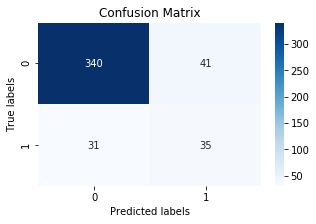

In [117]:
print_classification(y_test, y_pred)

With this algorithm, the Recall metric is 53%, which is the same as in the Logistic Regression.

Our main KPI - Precision - assumes a value of 46% which is higher than in the previous Decision Tree when all features where use, but lower than the 80% in the logistic regression.

This model also assumes the same value of Accuracy as the Logistic - 92% - but then again, it's heavily due to being albe to understand which users won't accept the campaign.

### 5. Comparing the Models

In [118]:
profit_dict = {}
# Old way
y_pred = [1] * len(y_test)
profit_dict['Old Way'] = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)

# Logistic
y_pred = LogisticRegression(random_state=0).fit(x_train_scaled, y_train).predict(x_test_scaled)
profit_dict['Logistic Regression'] = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)

# Decision Tree
y_pred = DecisionTreeClassifier(random_state=0).fit(x_train_scaled, y_train).predict(x_test_scaled)
profit_dict['Decision Tree'] = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)

# Decision Tree with selection
cols = ['Days_as_customer', 'AcceptedCmp5', 'Recency', 'MntWines', 'MntMeatProducts', 'Income', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases', 'Age', 'AcceptedCmp3', 'NumDealsPurchases', 'MntFishProducts', 'NumWebVisitsMonth', 'AcceptedCmp1', 'NumStorePurchases']
y_pred = DecisionTreeClassifier(random_state=0).fit(x_train_scaled[cols], y_train).predict(x_test_scaled[cols])
profit_dict['Decision Tree (w selection)'] = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)

In [119]:
models = pd.DataFrame.from_dict(profit_dict, orient = 'Index').reset_index()
models.columns = ['Model', 'Profit']

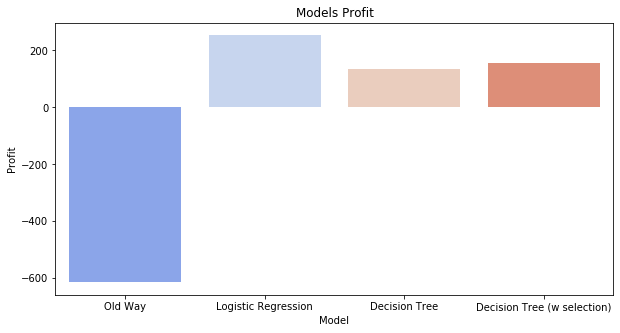

In [120]:
plt.figure(figsize = (10, 5))
sns.barplot(data = models, x = 'Model', y = 'Profit', palette = 'coolwarm')
plt.title('Models Profit')
plt.show()

As we can see, by comparing the 4 approaches, the one that has the worst results is through sending the campaign to everybody without any criteria and the one that has the best results is the Logistic Regression where we have a profit of 253€.

**[Q1]** Develop a supervised learning model to identify which customers are more likely to accept a future campaign. Hint: Use the result of the last campaign (#6 - Response) as the target variable. <br>

After doing the models, we will be using the results of 'Logistic Regression' to answer this question as it is the one that provides the highest profitability:

The customers that are more likely to accept a future campaign are those that have accepted the 1st, 3rd and 5th campaigns, those that spend more money in meat products and the customers that are enroled with the company for the longest time.

**[Q2]** How good is your model? Is it robust to unseen data? What are the most important characteristics to predict this response? What is the business viability of your model?

By looking into the results of the confusion matrix of the logistic regression, we can understand that based on the key metric 'Precision' the model is very good, as it is able to predict accurately 80% of the times in which it says that there will be a client that will accept the campaign and only 2 out of 10 estimations are wrong, leading to a decrease in the revenue and an increase in the losses.

Besides this metric, it also assumes an accuracy of 92% meaning that 92 out of 100 predictons made are correct - even though it is heavily influenced by the number of true negatives.

Recall, in this context, means the ratio of times in which the outcome actually is a client that accepts the campaign divided by the number of times in which the algorithm predicts that event and the times in which the algorithm says that a client will not subscribe to the campaign, but he/she actually does. In this algorithm, this metric has the value of 53%.

Finally, if we look into the F1 that is the harmonic mean between Precision and Recall, is 64%.

Overall, it's a good model for the purpose of estimating the acceptance of the campaign.

This model is robust to unseen data as it is more successful in detecting accurately the true labels than it does mistakes (True Positives and True Negatives are higher than False Positives and False Negatives).

In the logistic regression, the most important characteristics to predict a postive response is 'Days_as_customer', 'AcceptedCmp5' and 'AcceptedCmp3' that correspond to the number of days that have passed since the enrolment with the company and the acceptance of the 3rd and 5th campaign and to predict the negatives response the most important variables are 'Recency', 'NumStorePurchases' and 'Teenhome' which are the number of days that have passed since the last purchase, the number of times that a person has purchased in store and if a client has a teen at home.

The business viability of this model is of 253€.

**[Q3]** How would you segment the customers based on their product preferences, regardless of total ammount spent? Create a (short) marketing strategy for each one.

## What's the Approach?

In order to tackle this problem we are going to create variables that capture the relative amount of money invested in buying each product category:

In [121]:
Goods_Data['Total_Spent'] = Goods_Data.MntWines + Goods_Data.MntFruits + Goods_Data.MntMeatProducts + Goods_Data.MntFishProducts + Goods_Data.MntSweetProducts + Goods_Data.MntGoldProds 

In [122]:
Goods_Data['Percent_Wine'] = (Goods_Data['MntWines'] / Goods_Data['Total_Spent']) * 100
Goods_Data['Percent_Fruits'] = (Goods_Data['MntFruits'] / Goods_Data['Total_Spent']) * 100
Goods_Data['Percent_Meat'] = (Goods_Data['MntMeatProducts'] / Goods_Data['Total_Spent']) * 100
Goods_Data['Percent_Fish'] = (Goods_Data['MntFishProducts'] / Goods_Data['Total_Spent']) * 100
Goods_Data['Percent_Sweets'] = (Goods_Data['MntSweetProducts'] / Goods_Data['Total_Spent']) * 100
Goods_Data['Percent_Gold'] = (Goods_Data['MntGoldProds'] / Goods_Data['Total_Spent']) * 100

## Dealing with Outliers?

With this approach it isn't necessary to deal with outliers, as the variables created will represent the relative amount bought, removing the bias that there would be with by using the original attributes.

## Removing irrelevant Variables

In [123]:
cols_to_drop_3_3 = ['Age', 'Kidhome', 'Income', 'Teenhome', 'Recency' , 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Days_as_customer', 'High_Educ', 'MS_Married', 'MS_Single', 'MS_Together', 'MS_Widow', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntFruits', 'MntWines','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent']
Goods_Data.drop(columns = cols_to_drop_3_3, inplace = True)

## Creating the Clusters through KMeans

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(Goods_Data)
Goods_Data_scaled = scaler.transform(Goods_Data)
Goods_Data_scaled = pd.DataFrame(Goods_Data_scaled, columns = Goods_Data.columns, index = Goods_Data.index)
Goods_Data_scaled.head()

,Percent_Wine,Percent_Fruits,Percent_Meat,Percent_Fish,Percent_Sweets,Percent_Gold
ID,,,,,,
5524,0.407663,0.122147,0.338641,0.180010,0.057538,0.060864
2174,0.422928,0.083128,0.222866,0.125356,0.039157,0.248529
4141,0.569882,0.141724,0.164134,0.242070,0.028611,0.060531
6182,0.215454,0.169392,0.378452,0.319303,0.059844,0.105508
5324,0.425570,0.228699,0.280431,0.184470,0.067644,0.039753


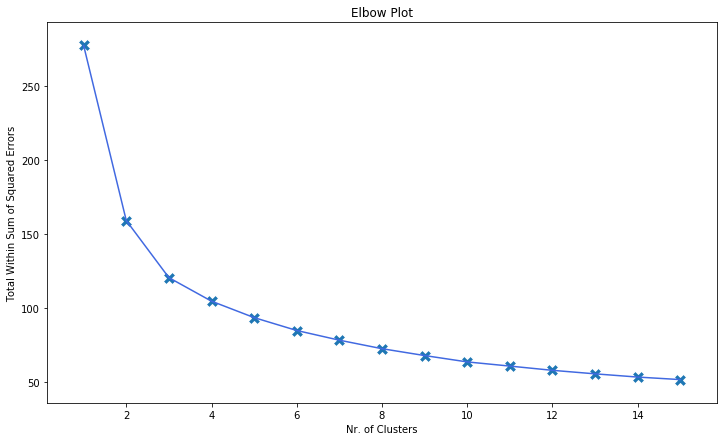

In [125]:
def plot_elbow(Goods_Data, max_clusters):
    from sklearn.cluster import KMeans
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters = k, random_state = 0)
        kmeans_model.fit(Goods_Data)
        sse.append(kmeans_model.inertia_)
    Goods_Data_sse = pd.DataFrame({'nr_clusters': range(1, max_clusters + 1), 'sse': sse})
    plt.figure(figsize = (12, 7))
    sns.lineplot(data = Goods_Data_sse, x = 'nr_clusters', y = 'sse', color = "royalblue")
    sns.scatterplot(data = Goods_Data_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
    plt.title('Elbow Plot')
    plt.ylabel('Total Within Sum of Squared Errors', fontsize = 10)
    plt.xlabel('Nr. of Clusters', fontsize = 10)
    plt.show()
    
# How to use:
plot_elbow(Goods_Data = Goods_Data_scaled, max_clusters = 15)

## How many Clusters should we use?

By looking at the Elbow Plot we understand that the elbow point is when K = 3, so that's the number of clusters that we will be using for this analysis:

In [126]:
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters = k, random_state = 0)
model.fit(Goods_Data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## Model's total error:

In [127]:
print(model.inertia_)

120.63288289254828


## Describing the Clusters obtained

In [128]:
Goods_Data_clustered = Goods_Data.copy()
Goods_Data_clustered['cluster'] = model.labels_

In [129]:
centroids = Goods_Data_clustered.groupby('cluster').mean()
centroids

,Percent_Wine,Percent_Fruits,Percent_Meat,Percent_Fish,Percent_Sweets,Percent_Gold
cluster,,,,,,
0,38.716115,4.923397,33.930124,7.193346,5.367623,9.869395
1,69.611383,1.743903,16.425910,2.534086,1.876318,7.808401
2,15.048251,11.351438,21.669646,16.124188,10.751578,25.054898


In [130]:
names = {0: 'Wine & Meat Buyers',
         1: 'Oenophiles',
         2: 'Gold & Meat Buyers'}

Goods_Data_clustered['cluster'] = Goods_Data_clustered['cluster'].replace(names)

As we can see, cluster 0 are composed by people who spend about 39% of their budget on Wine and 34% on Meat - "Wine & Meat Lovers";

Cluster 1 are people who adore Wine - "Oenophiles";

Finally, there's people who spend 1/4 of their money on Gold Products and 22% on Meat - "Gold & Meat Lovers".

ValueError: Could not interpret value `Income` for parameter `y`

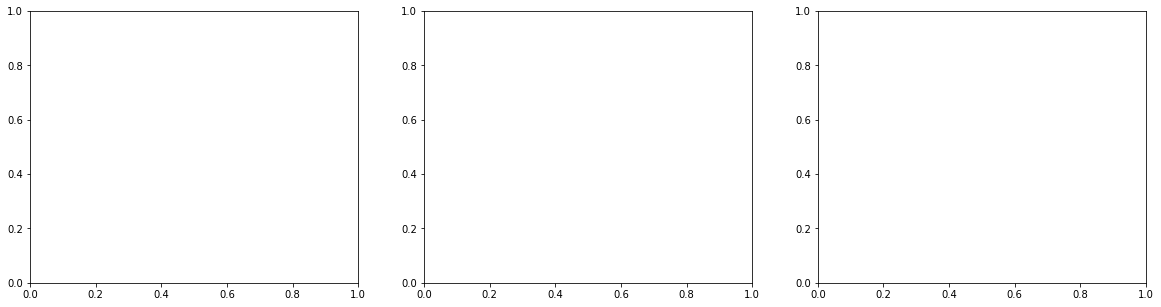

In [131]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids, x = 'Percent_Wine', y = 'Income', hue = 'cluster', ax = ax[0])
plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids, x = 'Percent_Fruits', y = 'Income', hue = 'cluster', ax = ax[1])
plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids, x = 'Percent_Meat', y = 'Income', hue = 'cluster', ax = ax[2])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = (20, 5))
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Wine', ax = ax[0], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Fruits', ax = ax[1], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Meat', ax = ax[2], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Fish', ax = ax[3], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Sweets', ax = ax[4], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'cluster', y = 'Percent_Gold', ax = ax[5], palette = 'coolwarm')
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)
ax[3].tick_params(axis='x', rotation=45)
ax[4].tick_params(axis='x', rotation=45)
ax[5].tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
sns.countplot(x = 'cluster', data = Goods_Data_clustered, color = "royalblue", ec="white")

In our model, 'Wine & Meat Buyers' represent the majority of the dataset, followed by 'Oenophiles' and finally 'Gold & Meat Buyers'.

## Creating the Clusters through Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(Goods_Data_scaled, method  = "ward"))
plt.axhline(y = 3.2, color = 'black', linestyle = '--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## How many Clusters should we use in this approach?

By looking at the Dendogram, we understand that the cut off point is K = 7, so that's the number of clusters that we will be using for this analysis:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hier_model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')
hier_model = hier_model.fit(Goods_Data_scaled)

## Describing the Clusters Obtained:

In [ ]:
Goods_Data_clustered['hier_cluster'] = hier_model.labels_

In [ ]:
hier_centroids = Goods_Data_clustered.groupby('hier_cluster').mean()[['Percent_Wine', 'Percent_Fruits', 'Percent_Meat','Percent_Fish' ,'Percent_Sweets' , 'Percent_Gold']]
hier_centroids

In [ ]:
names = {0: 'Balanced Diet',
         1: 'Wine & Gold Buyers',
         2: 'Gold & Meat Buyers',
         3: 'Wine & Meat Buyers',
         4: 'Wine & Meat Buyers',
         5: 'Meat & Wine Buyers',
         6: 'Oenophiles'}

Goods_Data_clustered['hier_cluster'] = Goods_Data_clustered['hier_cluster'].replace(names)

As we can see, cluster 0 are composed by people who have a balanced diet as they spend more money on fish than on meat, and spend more on fruit than on sweets;

Cluster 1 are people who spend 34% of their budget on Wine and 28% on Gold Products;

Cluster 2 is described by being the ones who invest most of their budget on Gold Products, followed by Meat;

Cluster 3 are people who spend approximately 64% of their money on Wine, maybe to go along with their meat (19% of the total budget);

In a similar fashion, Cluster 4 has the same dynamic, but spend less on wine (50%) and more on meat (28%);

The Hierarchical Cluster 5 gives priority to the meat that they buy (40%) and wine (32%);

Finally, there's people who spend 4/5 of their money on Wine - "Oenophiles".

In [ ]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids_kmeans, x = 'Percent_Wine', y = 'Income', hue = 'cluster_kmeans', ax = ax[0])
#plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids_kmeans, x = 'Age', y = 'Income', hue = 'cluster_kmeans', ax = ax[1])
#plot_scatter_cluster(data = Goods_Data_clustered, centroids = centroids_kmeans, x = 'Age', y = 'Income', hue = 'cluster_kmeans', ax = ax[2])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = (20, 5))
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Wine', ax = ax[0], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Fruits', ax = ax[1], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Meat', ax = ax[2], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Fish', ax = ax[3], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Sweets', ax = ax[4], palette = 'coolwarm')
sns.boxplot(data = Goods_Data_clustered, x = 'hier_cluster', y = 'Percent_Gold', ax = ax[5], palette = 'coolwarm')
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)
ax[3].tick_params(axis='x', rotation=45)
ax[4].tick_params(axis='x', rotation=45)
ax[5].tick_params(axis='x', rotation=45)
plt.show()

## Which Approach will we use?

By looking at the different cluster characterizations of the 2 algorithms used, I've decided to use the clusters from KMeans for the marketing strategy as the ones from Hierarchical Clustering aren't that different from one another.

## Marketing Strategy

After developing the KMeans algorithm, we were left with 3 Clusters - the Wine & Meat Buyers, the Oenophiles and the Gold & Meat products.

As we've seen previously, the majority of the purchases are made either In Store or Online, so our strategy should take that into consideration.

As we know that there's a lot of people who are characterized by buying Wine & Meat or Gold & Meat, a good strategy would be for the offline stores to put the aisles close to one another, so that when one goes to buy their meat, they are close to both the wine and the gold products.

Regarding their online assets, when one is buying, for instance, their wine, there should an algorithm that would recommend a suggestion to go along with the wine that would a meat products. In similar fashion, the same thing could happen when buying a gold product.

This would be a great opportunity to improve on cross-sell.

Besides this, one could leverage from their CRM/Loyalty Program to send promotions with the following logic:

- To Wine & Meat Buyers: Since about 39% of their budget is spent on Wine and 34% on Meat, a promotion could be sent to these users so that when they spend a specific amount of money on meat, they get a coupon on an expensive wine that is above their average expenditure on wine so that they feel tempted to spend more on wine and meat;


- Oenophiles: These shoppers spend 70% of their budget on wine and aren't really interested in other types of products, so a special benefit like 'buy 2 get 3' could be great to entice these users to spend more money;


- To Gold & Meat Buyers: This type of users are the ones that spend the highest percentage of money on Gold, Sweets and Fruit products while the other 2 clusters aren't really that fond of those products, so when this users spend a specific amount of money on Gold, they get an incentive through a promotion to buy these categories and foster the consumption of this products.

# Final Remarks

Thank you for the time spent reading my work. It was plenty of fun!

**Diogo Diogo**